<a href="https://colab.research.google.com/github/fityanhanif/Keywords_Prediction_LSTM/blob/main/Peramalan%20Pengnujung%20Website%20dan%20Kata%20Kunci%20Dalam%207%20Hari%20Kedepan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
#Import Library

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import SimpleRNN,  Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from google.colab import drive
from datetime import timedelta, datetime
import zipfile
from google.colab import files

### Import Data

In [ ]:
#Cek Data
data = pd.read_csv("merged_data3.csv", delimiter=",")
data.tail(10)

Date   Date_int  User  New User  Real User  \
351   6-Jul-23   7/6/2023   127       119        246   
352   7-Jul-23   7/7/2023   114       109        223   
353   8-Jul-23   7/8/2023   132       125        257   
354   9-Jul-23   7/9/2023   153       144        297   
355  10-Jul-23  7/10/2023    91        83        174   
356  11-Jul-23  7/11/2023   102        95        197   
357  12-Jul-23  7/12/2023   171       160        331   
358  13-Jul-23  7/13/2023   207       192        399   
359  14-Jul-23  7/14/2023   190       169        359   
360  15-Jul-23  7/15/2023   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
351              48                 38  
352              42                 30  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
data_dropped = data.dropna()

In [ ]:
data_dropped.tail(10)

Date   Date_int  User  New User  Real User  \
351   6-Jul-23   7/6/2023   127       119        246   
352   7-Jul-23   7/7/2023   114       109        223   
353   8-Jul-23   7/8/2023   132       125        257   
354   9-Jul-23   7/9/2023   153       144        297   
355  10-Jul-23  7/10/2023    91        83        174   
356  11-Jul-23  7/11/2023   102        95        197   
357  12-Jul-23  7/12/2023   171       160        331   
358  13-Jul-23  7/13/2023   207       192        399   
359  14-Jul-23  7/14/2023   190       169        359   
360  15-Jul-23  7/15/2023   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
351              48                 38  
352              42                 30  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
#Ubah Tipe Date agar masuk ke pandas
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index and keep the column
data.set_index('Date', inplace=True, drop=False)



<ipython-input-8-d8d7a9a4c1d8>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data_dropped

Date   Date_int  User  New User  Real User  \
0    20-Jul-22  7/20/2022   104        96        200   
1    21-Jul-22  7/21/2022    73        66        139   
2    22-Jul-22  7/22/2022    63        61        124   
3    23-Jul-22  7/23/2022    48        45         93   
4    24-Jul-22  7/24/2022    38        37         75   
..         ...        ...   ...       ...        ...   
356  11-Jul-23  7/11/2023   102        95        197   
357  12-Jul-23  7/12/2023   171       160        331   
358  13-Jul-23  7/13/2023   207       192        399   
359  14-Jul-23  7/14/2023   190       169        359   
360  15-Jul-23  7/15/2023   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

## Real User

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

Jumlah nilai yang tidak valid dalam 'Real User': 0


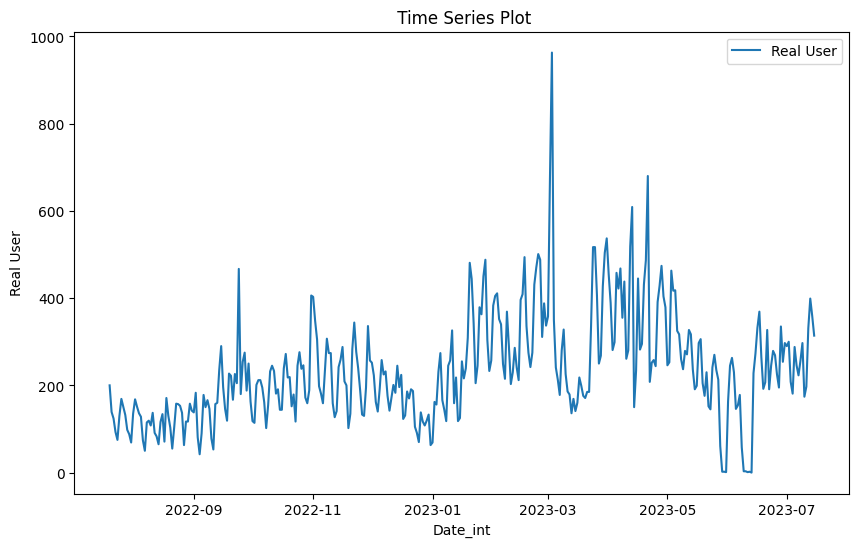

In [ ]:
# Ubah tipe data kolom 'Tanggal' ke tipe data datetime jika perlu
data['Date_int'] = pd.to_datetime(data['Date_int'])

# Periksa apakah ada nilai yang tidak valid
invalid_values = data['Real User'].isna().sum()
print(f"Jumlah nilai yang tidak valid dalam 'Real User': {invalid_values}")

# Jika ada nilai yang tidak valid, tangani sesuai
if invalid_values > 0:
    # Misalnya, Anda bisa menghapus baris yang mengandung nilai-nilai tersebut
    data = data.dropna(subset=['Real User'])
    print("Nilai yang tidak valid telah dihapus.")

# plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date_int'], data['Real User'], label='Real User')
plt.title(' Time Series Plot')
plt.xlabel('Date_int')
plt.ylabel('Real User')
plt.legend()
plt.show()

In [ ]:
data.iloc[:1]

Date_int       Date  User  New User  Real User           Keyword  \
0 2022-07-20  20-Jul-22   104        96        200  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
# Setting 353 percent data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:

test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["Real User"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.20768432]
 [0.1443406 ]
 [0.12876428]
 [0.09657321]
 [0.07788162]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["Real User"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.36888889] [0.54666667] [0.] [0.10222222] [0.69777778]


Scale


<Figure size 1000x600 with 0 Axes>

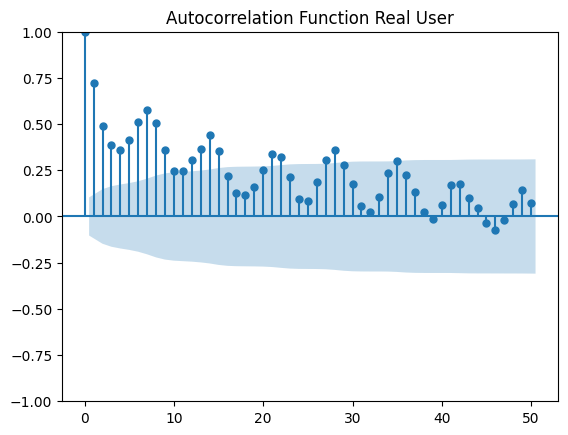

<Figure size 1000x600 with 0 Axes>

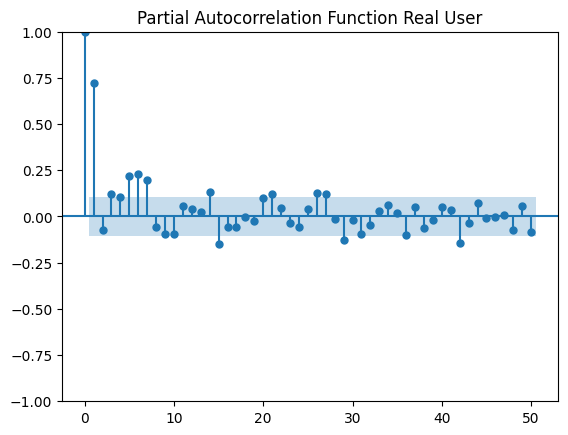

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Memuat data tanpa mengonversi kolom tanggal
data = pd.read_csv('merged_data3.csv')

# Mengonversi kolom 'Date' ke format datetime dengan format yang sesuai
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menentukan kolom tanggal sebagai index
data.set_index('Date_int', inplace=True)

# Memilih kolom yang dibutuhkan
data_series = data['Real User']

# Plot ACF
plt.figure(figsize=(10,6))
plot_acf(data_series, lags=50)
plt.title('Autocorrelation Function Real User')
plt.show()

# Plot PACF
plt.figure(figsize=(10,6))
plot_pacf(data_series, lags=50)
plt.title('Partial Autocorrelation Function Real User')
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 6s 121ms/step - loss: 0.0336 - mae: 0.1394 - mape: 57.7174 - val_loss: 0.0156 - val_mae: 0.1006 - val_mape: 2059574.3750
Epoch 2/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0149 - mae: 0.1016 - mape: 63.0256 - val_loss: 0.0135 - val_mae: 0.0912 - val_mape: 1667588.2500
Epoch 3/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0112 - mae: 0.0721 - mape: 34.0059 - val_loss: 0.0180 - val_mae: 0.1030 - val_mape: 1291158.1250
Epoch 4/250
8/8 [==============================] - 0s 17ms/step - loss: 0.0115 - mae: 0.0708 - mape: 31.9795 - val_loss: 0.0137 - val_mae: 0.0916 - val_mape: 1581280.5000
Epoch 5/250
8/8 [==============================] - 0s 22ms/step - loss: 0.0115 - mae: 0.0794 - mape: 46.4649 - val_loss: 0.0134 - val_mae: 0.0925 - val_mape: 1772343.3750
Epoch 6/250
8/8 [==============================] - 0s 17ms/step - loss: 0.0103 - mae: 0.0717 - mape:

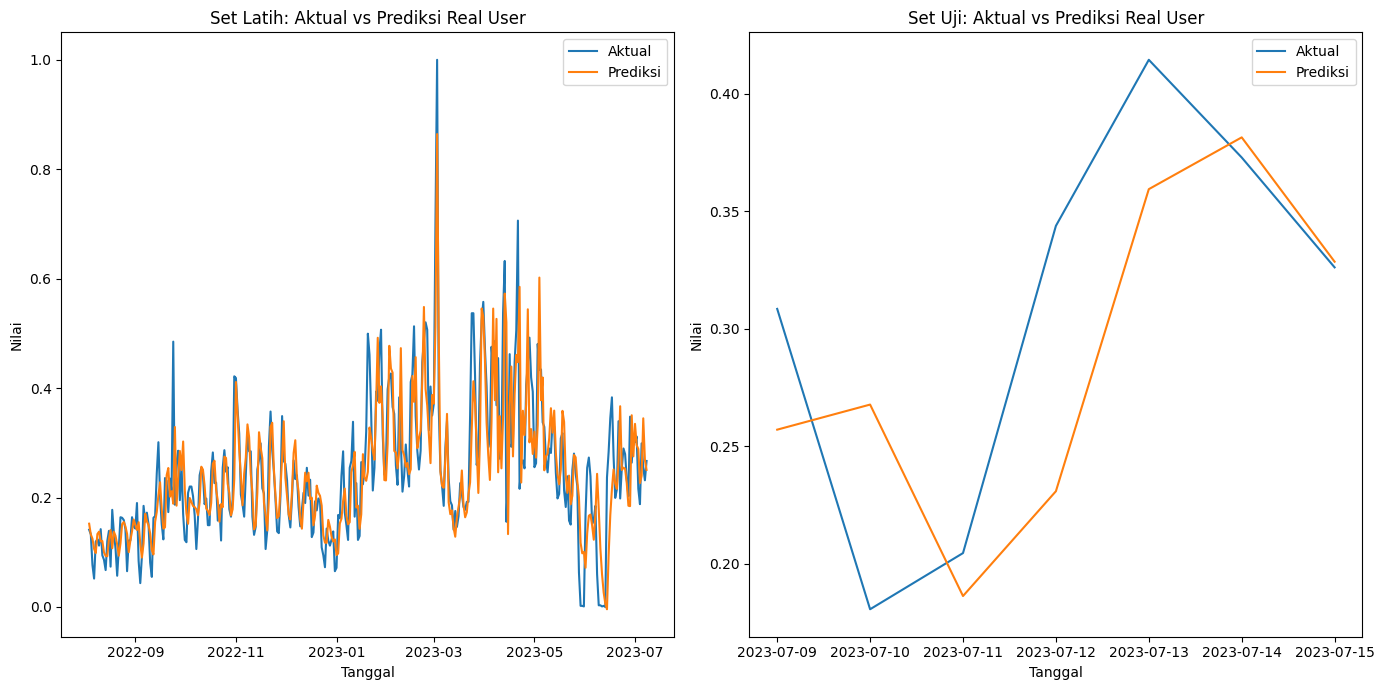

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['Real User']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Memplot nilai aktual vs prediksi untuk set latih dan uji
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.subplot(1, 2, 1)
plt.plot(dates[:train_size], y_train, label='Aktual')
plt.plot(dates[:train_size], train_predicted, label='Prediksi')
plt.title('Set Latih: Aktual vs Prediksi Real User')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

# Memplot prediksi uji
plt.subplot(1, 2, 2)
plt.plot(dates[train_size:], y_test, label='Aktual')
plt.plot(dates[train_size:], test_predicted, label='Prediksi')
plt.title('Set Uji: Aktual vs Prediksi Real User')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

plt.tight_layout()
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 4s 111ms/step - loss: 0.0244 - mae: 0.1174 - mape: 51.5627 - val_loss: 0.0201 - val_mae: 0.1159 - val_mape: 2149428.5000
Epoch 2/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0126 - mae: 0.0873 - mape: 51.0802 - val_loss: 0.0152 - val_mae: 0.0954 - val_mape: 1332913.7500
Epoch 3/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0115 - mae: 0.0709 - mape: 31.6969 - val_loss: 0.0141 - val_mae: 0.0929 - val_mape: 1421964.7500
Epoch 4/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0103 - mae: 0.0720 - mape: 38.3188 - val_loss: 0.0132 - val_mae: 0.0922 - val_mape: 1675177.0000
Epoch 5/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0107 - mae: 0.0733 - mape: 38.6695 - val_loss: 0.0135 - val_mae: 0.0915 - val_mape: 1457836.8750
Epoch 6/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0106 - mae: 0.0727 - mape:

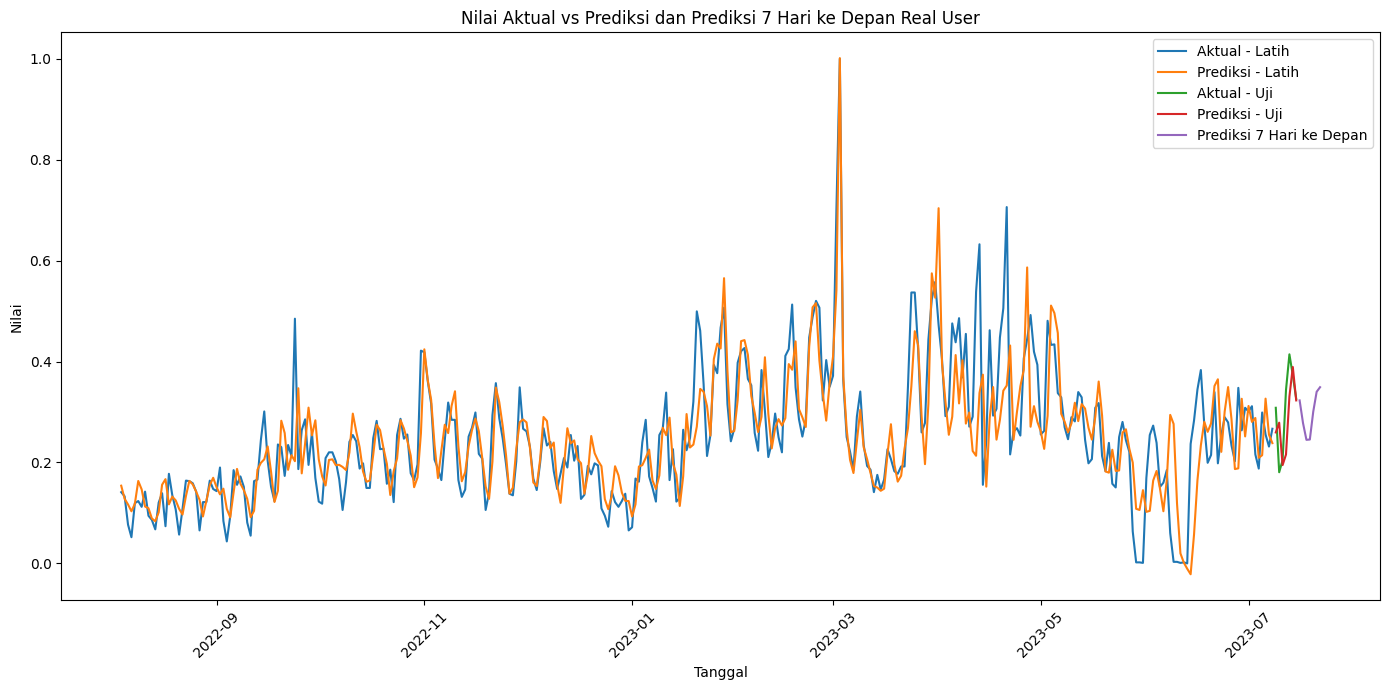

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import timedelta, datetime

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['Real User']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Mengembalikan skala y_train dan y_test ke skala asli
y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = model.predict(current_sequence.reshape((1, lag, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 7 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = data.index[-1]

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

# Memplot nilai aktual vs prediksi untuk set latih dan uji, serta prediksi masa depan
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.plot(dates[:train_size], y_train, label='Aktual - Latih')
plt.plot(dates[:train_size], train_predicted, label='Prediksi - Latih')

# Memplot prediksi uji
plt.plot(dates[train_size:], y_test, label='Aktual - Uji')
plt.plot(dates[train_size:], test_predicted, label='Prediksi - Uji')

# Memplot prediksi masa depan
plt.plot(future_dates, future_predictions, label='Prediksi 7 Hari ke Depan')

plt.title('Nilai Aktual vs Prediksi dan Prediksi 7 Hari ke Depan Real User')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import timedelta, datetime

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = regressorLSTM.predict(current_sequence.reshape((1, 15, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 10 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = datetime.strptime('20230715', '%Y%m%d')

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

1/1 [==============================] - 0s 19ms/step
        Date  Predicted Value
0 2023-07-16       311.046814
1 2023-07-17       267.670013
2 2023-07-18       235.854416
3 2023-07-19       236.424713
4 2023-07-20       289.642883
5 2023-07-21       327.533783
6 2023-07-22       336.282471


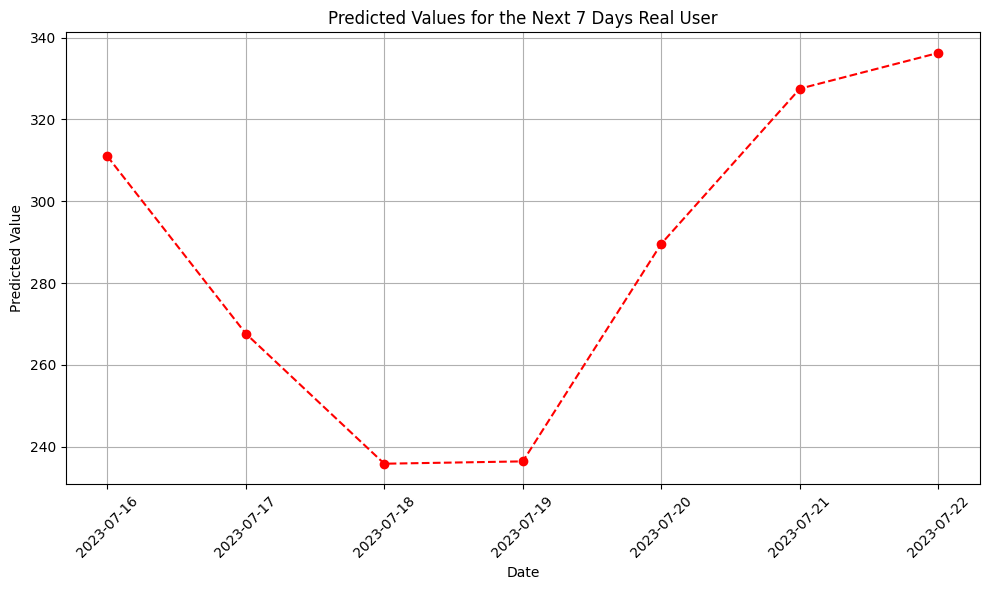

In [ ]:
# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_predictions_with_dates['Date'], future_predictions_with_dates['Predicted Value'], marker='o', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Predicted Values for the Next 7 Days Real User')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


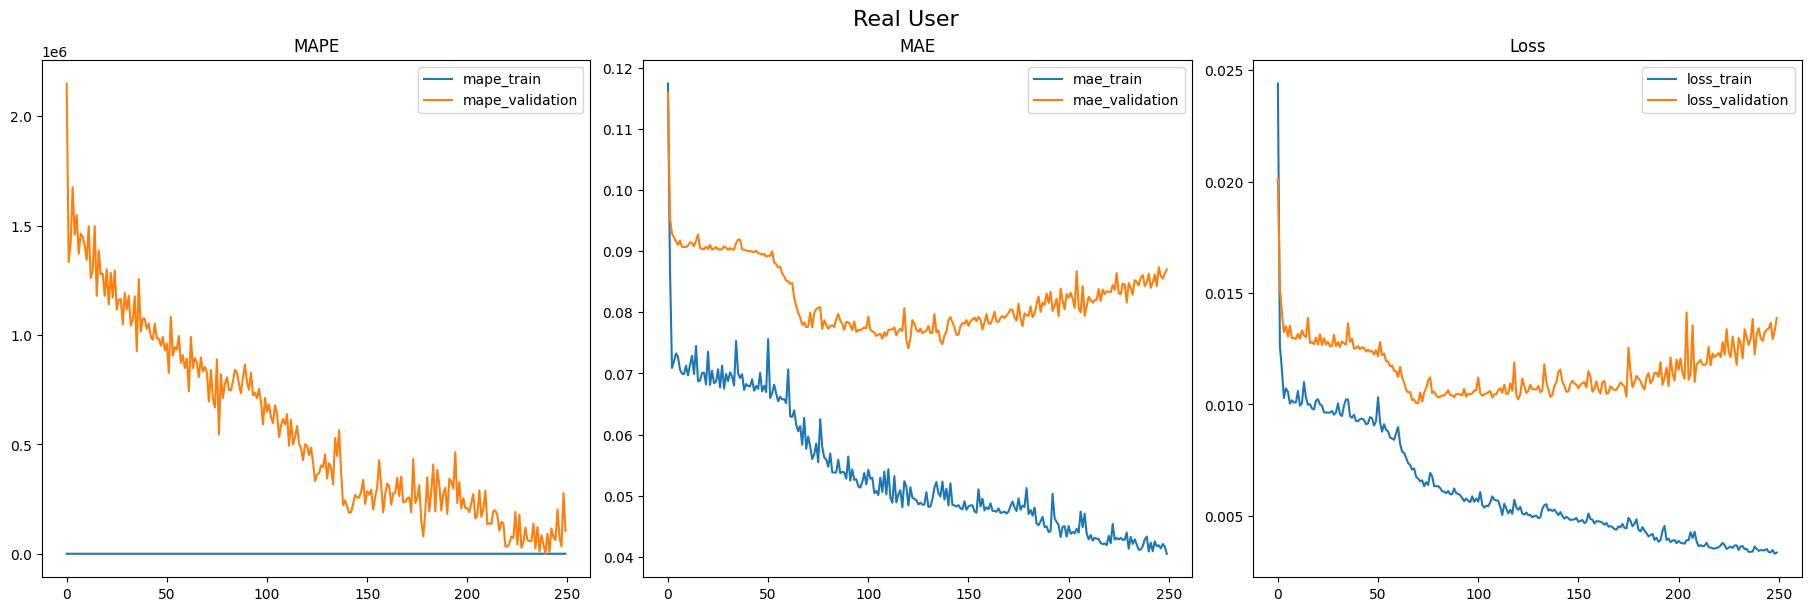

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('Real User', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_ru.png')

plt.show()

### Keyword

In [ ]:
#Cek Data
datas = pd.read_csv("merged_data3.csv", delimiter=",")
data_dropped.tail(10)


Date   Date_int  User  New User  Real User  \
351   6-Jul-23   7/6/2023   127       119        246   
352   7-Jul-23   7/7/2023   114       109        223   
353   8-Jul-23   7/8/2023   132       125        257   
354   9-Jul-23   7/9/2023   153       144        297   
355  10-Jul-23  7/10/2023    91        83        174   
356  11-Jul-23  7/11/2023   102        95        197   
357  12-Jul-23  7/12/2023   171       160        331   
358  13-Jul-23  7/13/2023   207       192        399   
359  14-Jul-23  7/14/2023   190       169        359   
360  15-Jul-23  7/15/2023   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
351              48                 38  
352              42                 30  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
columns_to_drop = ['iot', 'machine learning', 'bisnis digital', 'kecerdasan buatan']
data_vending_machine = data_dropped.drop(columns=columns_to_drop)

columns_to_drop = ['vending machine', 'machine learning', 'bisnis digital', 'kecerdasan buatan']
data_iot = data_dropped.drop(columns=columns_to_drop)

columns_to_drop = ['vending machine', 'iot', 'bisnis digital', 'kecerdasan buatan']
data_machine_learning = data_dropped.drop(columns=columns_to_drop)

columns_to_drop = ['vending machine', 'iot', 'machine learning', 'kecerdasan buatan']
data_bisnis_digital = data_dropped.drop(columns=columns_to_drop)

columns_to_drop = ['vending machine','iot', 'machine learning', 'bisnis digital']
data_kecerdasan_buatan = data_dropped.drop(columns=columns_to_drop)



## Vending Machine

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

Jumlah nilai yang tidak valid dalam 'vending machine': 0


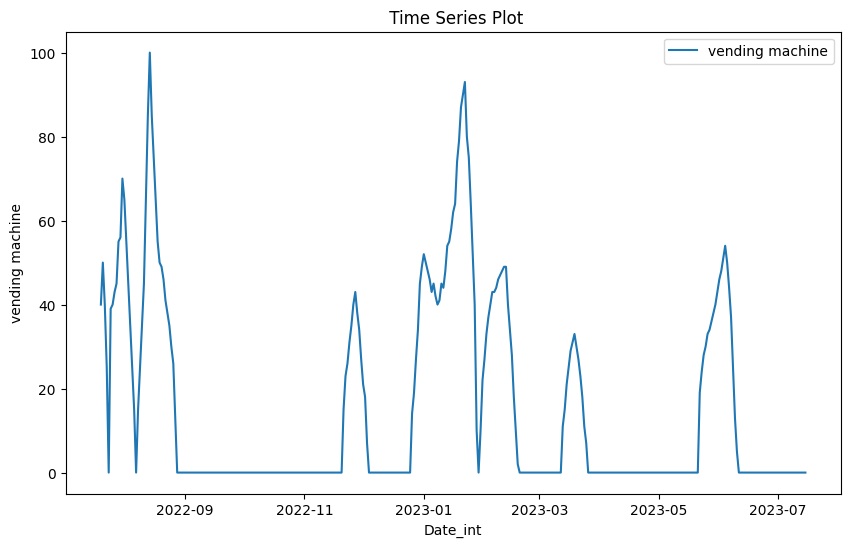

In [ ]:
# Ubah tipe data kolom 'Tanggal' ke tipe data datetime jika perlu
data['Date_int'] = pd.to_datetime(data['Date_int'])

# Periksa apakah ada nilai yang tidak valid
invalid_values = data['vending machine'].isna().sum()
print(f"Jumlah nilai yang tidak valid dalam 'vending machine': {invalid_values}")

# Jika ada nilai yang tidak valid, tangani sesuai
if invalid_values > 0:
    # Misalnya, Anda bisa menghapus baris yang mengandung nilai-nilai tersebut
    data = data.dropna(subset=['vending machine'])
    print("Nilai yang tidak valid telah dihapus.")

# Sekarang coba plot kembali
plt.figure(figsize=(10, 6))
plt.plot(data['Date_int'], data['vending machine'], label='vending machine')
plt.title(' Time Series Plot')
plt.xlabel('Date_int')
plt.ylabel('vending machine')
plt.legend()
plt.show()

In [ ]:
data.iloc[:1]

Date_int       Date  User  New User  Real User           Keyword  \
0 2022-07-20  20-Jul-22   104        96        200  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
# Setting 353 percent data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["vending machine"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

#ACF & PACF


<Figure size 1000x600 with 0 Axes>

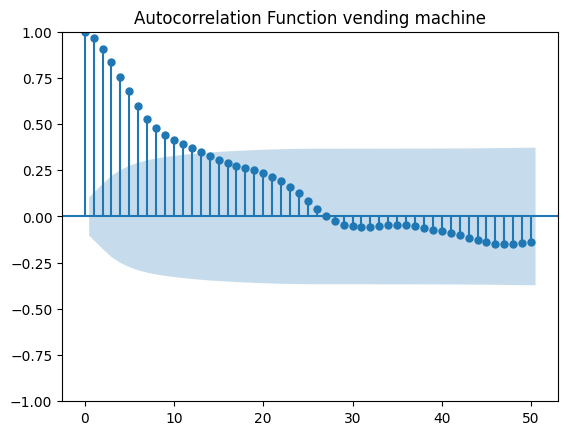

<Figure size 1000x600 with 0 Axes>

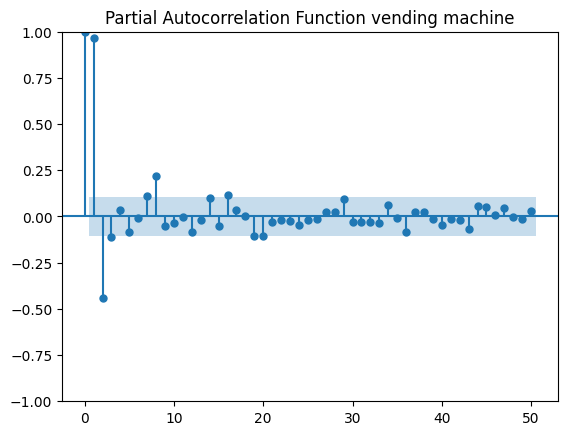

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Memuat data tanpa mengonversi kolom tanggal
data = pd.read_csv('merged_data3.csv')

# Mengonversi kolom 'Date' ke format datetime dengan format yang sesuai
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menentukan kolom tanggal sebagai index
data.set_index('Date_int', inplace=True)

# Memilih kolom yang dibutuhkan
data_series = data['vending machine']

# Plot ACF
plt.figure(figsize=(10,6))
plot_acf(data_series, lags=50)
plt.title('Autocorrelation Function vending machine')
plt.show()

# Plot PACF
plt.figure(figsize=(10,6))
plot_pacf(data_series, lags=50)
plt.title('Partial Autocorrelation Function vending machine')
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 5s 163ms/step - loss: 0.0614 - mae: 0.1623 - mape: 33739980.0000 - val_loss: 0.0227 - val_mae: 0.1388 - val_mape: 102658048.0000
Epoch 2/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0366 - mae: 0.1594 - mape: 81350760.0000 - val_loss: 0.0183 - val_mae: 0.1198 - val_mape: 82797520.0000
Epoch 3/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0326 - mae: 0.1398 - mape: 55428960.0000 - val_loss: 0.0140 - val_mae: 0.0902 - val_mape: 50067320.0000
Epoch 4/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0305 - mae: 0.1261 - mape: 41621624.0000 - val_loss: 0.0130 - val_mae: 0.0871 - val_mape: 49535796.0000
Epoch 5/250
8/8 [==============================] - 0s 29ms/step - loss: 0.0289 - mae: 0.1261 - mape: 46987772.0000 - val_loss: 0.0118 - val_mae: 0.0850 - val_mape: 49786976.0000
Epoch 6/250
8/8 [==============================] - 0s 38ms/step 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


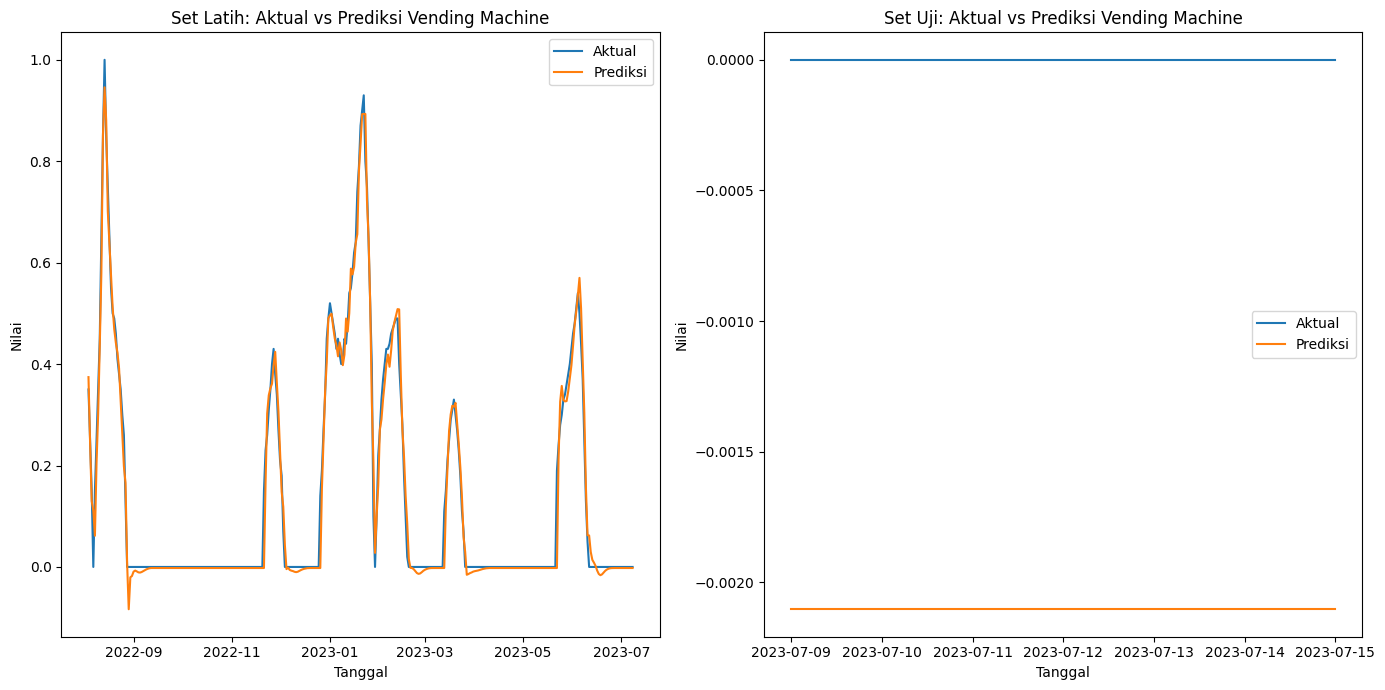

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['vending machine']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Memplot nilai aktual vs prediksi untuk set latih dan uji
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.subplot(1, 2, 1)
plt.plot(dates[:train_size], y_train, label='Aktual')
plt.plot(dates[:train_size], train_predicted, label='Prediksi')
plt.title('Set Latih: Aktual vs Prediksi Vending Machine')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

# Memplot prediksi uji
plt.subplot(1, 2, 2)
plt.plot(dates[train_size:], y_test, label='Aktual')
plt.plot(dates[train_size:], test_predicted, label='Prediksi')
plt.title('Set Uji: Aktual vs Prediksi Vending Machine')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

plt.tight_layout()
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 5s 115ms/step - loss: 0.0633 - mae: 0.1734 - mape: 37728016.0000 - val_loss: 0.0261 - val_mae: 0.1496 - val_mape: 114467688.0000
Epoch 2/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0419 - mae: 0.1721 - mape: 94886664.0000 - val_loss: 0.0197 - val_mae: 0.1240 - val_mape: 86377952.0000
Epoch 3/250
8/8 [==============================] - 0s 13ms/step - loss: 0.0346 - mae: 0.1412 - mape: 52435684.0000 - val_loss: 0.0148 - val_mae: 0.0892 - val_mape: 45310428.0000
Epoch 4/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0347 - mae: 0.1319 - mape: 38354664.0000 - val_loss: 0.0144 - val_mae: 0.0927 - val_mape: 52362952.0000
Epoch 5/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0307 - mae: 0.1303 - mape: 48909108.0000 - val_loss: 0.0154 - val_mae: 0.1011 - val_mape: 65402388.0000
Epoch 6/250
8/8 [==============================] - 0s 11ms/step 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1/1 [==============================] - 0s 18ms/step
        Date  Predicted Value
0 2023-07-16         0.003460
1 2023-07-17         0.007217
2 2023-07-18         0.012007
3 2023-07-19         0.017551
4 2023-07-20         0.023657
5 2023-07-21         0.030131
6 2023-07-22         0.036784


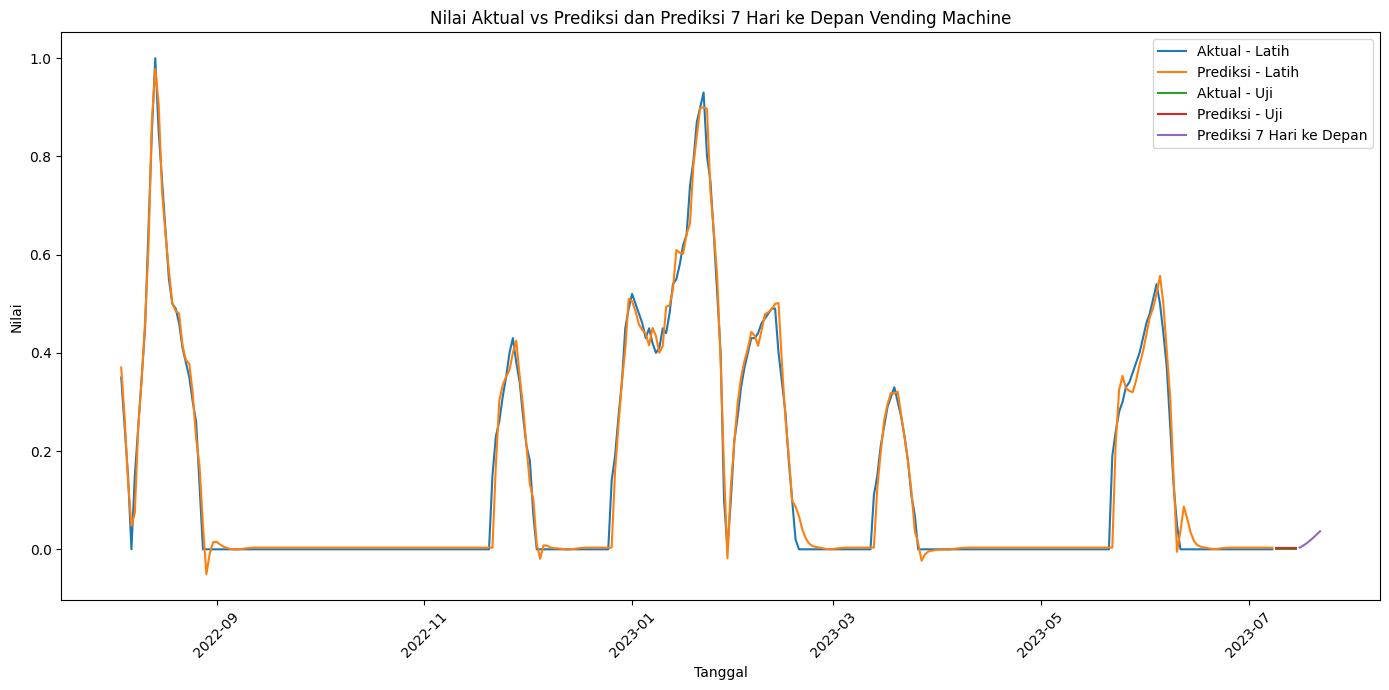

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import timedelta, datetime

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['vending machine']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Mengembalikan skala y_train dan y_test ke skala asli
y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = model.predict(current_sequence.reshape((1, lag, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 7 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = data.index[-1]

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

# Memplot nilai aktual vs prediksi untuk set latih dan uji, serta prediksi masa depan
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.plot(dates[:train_size], y_train, label='Aktual - Latih')
plt.plot(dates[:train_size], train_predicted, label='Prediksi - Latih')

# Memplot prediksi uji
plt.plot(dates[train_size:], y_test, label='Aktual - Uji')
plt.plot(dates[train_size:], test_predicted, label='Prediksi - Uji')

# Memplot prediksi masa depan
plt.plot(future_dates, future_predictions, label='Prediksi 7 Hari ke Depan')

plt.title('Nilai Aktual vs Prediksi dan Prediksi 7 Hari ke Depan Vending Machine')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import timedelta, datetime

# Memilih kolom target
data_series = data['vending machine']

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = regressorLSTM.predict(current_sequence.reshape((1, 15, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 10 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = datetime.strptime('20230715', '%Y%m%d')

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

1/1 [==============================] - 0s 19ms/step
        Date  Predicted Value
0 2023-07-16         0.346025
1 2023-07-17         0.721690
2 2023-07-18         1.200742
3 2023-07-19         1.755116
4 2023-07-20         2.365686
5 2023-07-21         3.013086
6 2023-07-22         3.678396


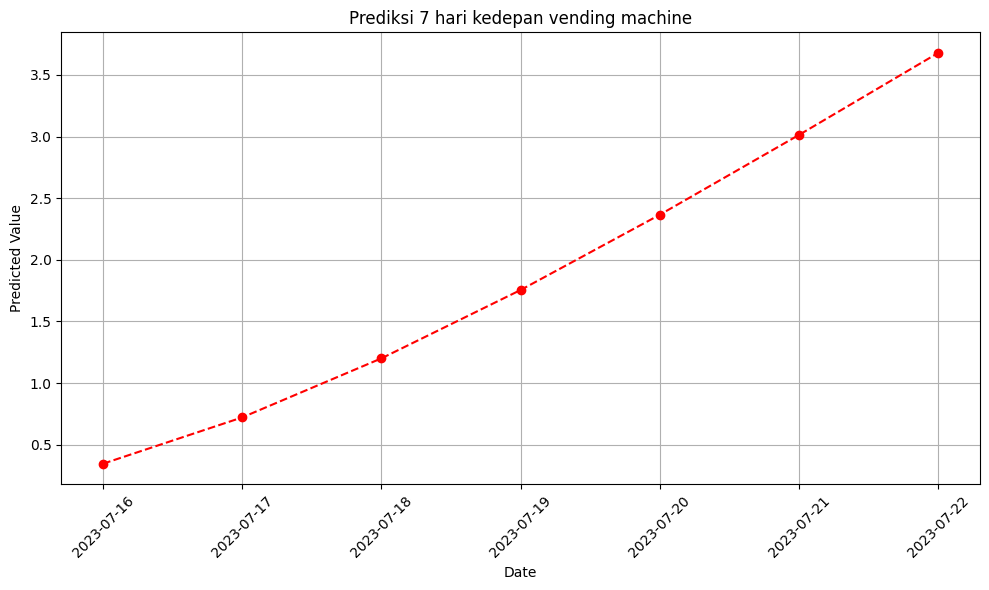

In [ ]:
# Plot the future predictions
# Memilih kolom target
data_series = data['vending machine']
plt.figure(figsize=(10, 6))
plt.plot(future_predictions_with_dates['Date'], future_predictions_with_dates['Predicted Value'], marker='o', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Prediksi 7 hari kedepan vending machine')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


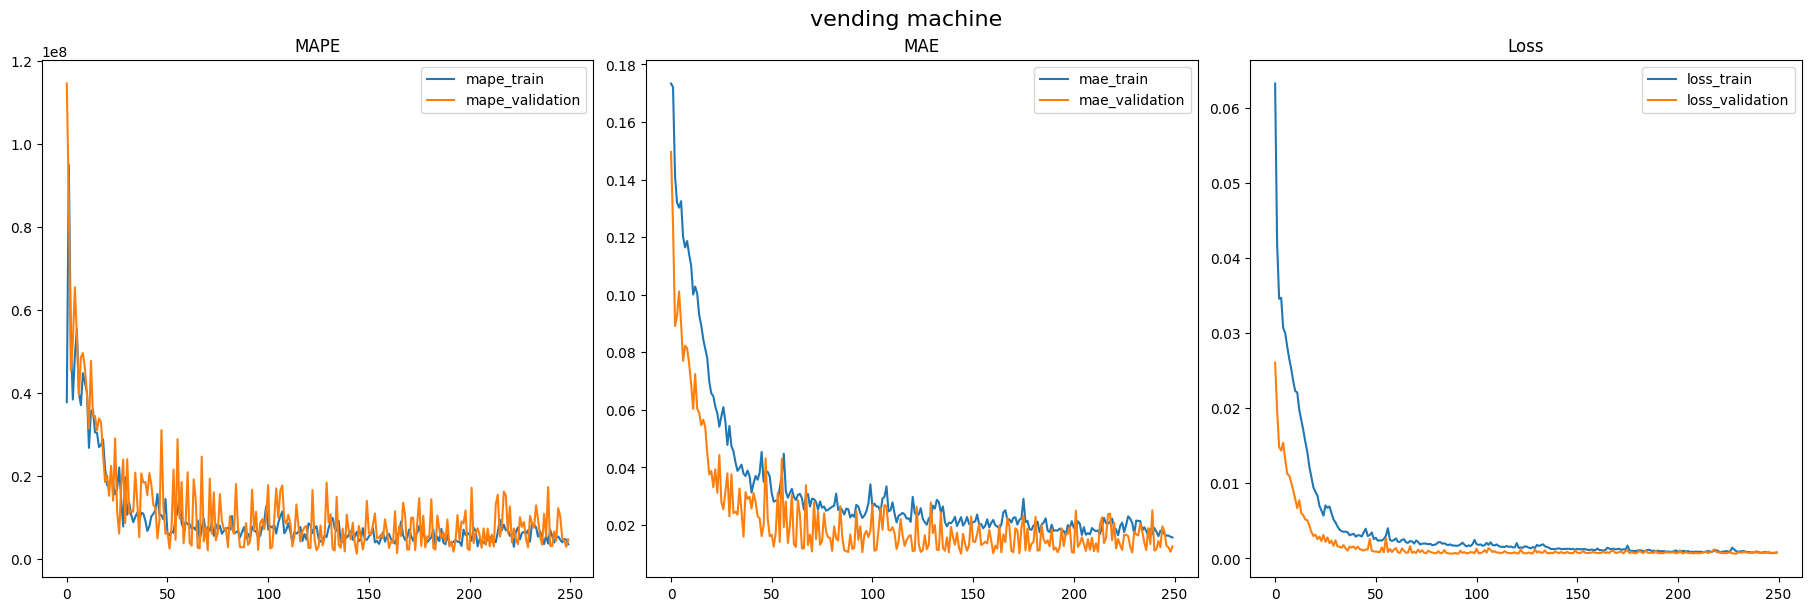

In [ ]:
import matplotlib.pyplot as plt

# Memilih kolom target
data_series = data['vending machine']

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('vending machine', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_ru.png')

plt.show()

#IoT

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

Jumlah nilai yang tidak valid dalam 'iot': 0


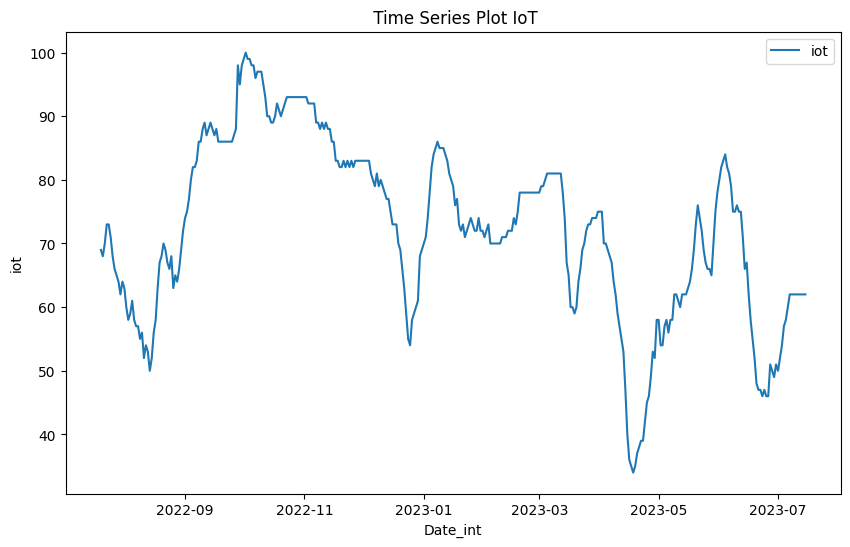

In [ ]:
# Ubah tipe data kolom 'Tanggal' ke tipe data datetime jika perlu
data['Date_int'] = pd.to_datetime(data['Date_int'])

# Periksa apakah ada nilai yang tidak valid
invalid_values = data['iot'].isna().sum()
print(f"Jumlah nilai yang tidak valid dalam 'iot': {invalid_values}")

# Jika ada nilai yang tidak valid, tangani sesuai
if invalid_values > 0:
    # Misalnya, Anda bisa menghapus baris yang mengandung nilai-nilai tersebut
    data = data.dropna(subset=['iot'])
    print("Nilai yang tidak valid telah dihapus.")

# Sekarang coba plot kembali
plt.figure(figsize=(10, 6))
plt.plot(data['Date_int'], data['iot'], label='iot')
plt.title(' Time Series Plot IoT')
plt.xlabel('Date_int')
plt.ylabel('iot')
plt.legend()
plt.show()

In [ ]:
data.iloc[:1]

Date_int       Date  User  New User  Real User           Keyword  \
0 2022-07-20  20-Jul-22   104        96        200  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
# Setting 353 data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["iot"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.53030303]
 [0.51515152]
 [0.54545455]
 [0.59090909]
 [0.59090909]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["iot"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.] [0.] [0.] [0.] [0.]


#ACF & PACF


<Figure size 1000x600 with 0 Axes>

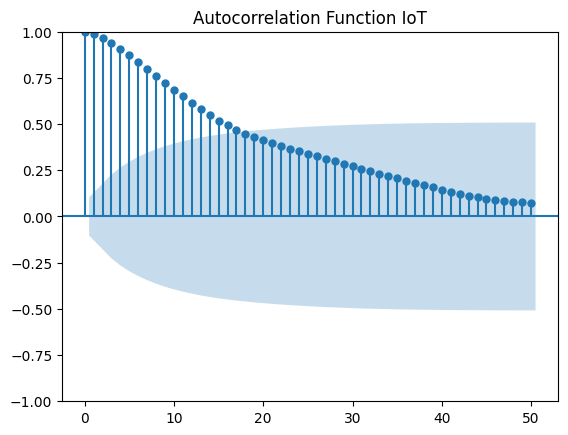

<Figure size 1000x600 with 0 Axes>

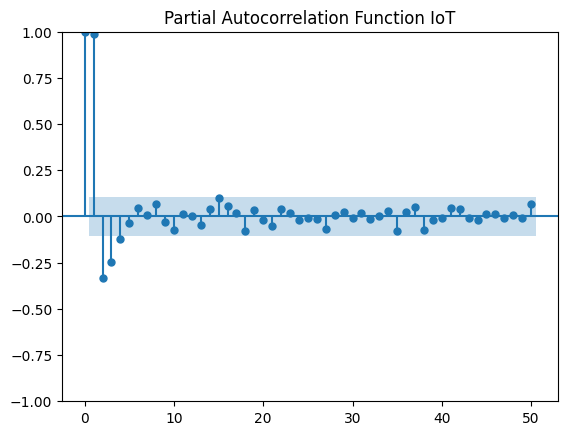

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Memuat data tanpa mengonversi kolom tanggal
data = pd.read_csv('merged_data3.csv')

# Mengonversi kolom 'Date' ke format datetime dengan format yang sesuai
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menentukan kolom tanggal sebagai index
data.set_index('Date_int', inplace=True)

# Memilih kolom yang dibutuhkan
data_series = data['iot']

# Plot ACF
plt.figure(figsize=(10,6))
plot_acf(data_series, lags=50)
plt.title('Autocorrelation Function IoT')
plt.show()

# Plot PACF
plt.figure(figsize=(10,6))
plot_pacf(data_series, lags=50)
plt.title('Partial Autocorrelation Function IoT')
plt.show()


Total data: 351
Data latih: 344
Data uji: 7
Epoch 1/250
8/8 [==============================] - 6s 186ms/step - loss: 0.3599 - mae: 0.5685 - mape: 84.6631 - val_loss: 0.0474 - val_mae: 0.1880 - val_mape: 1840962.2500
Epoch 2/250
8/8 [==============================] - 0s 13ms/step - loss: 0.0519 - mae: 0.1852 - mape: 29.0586 - val_loss: 0.0655 - val_mae: 0.2117 - val_mape: 4701623.5000
Epoch 3/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0287 - mae: 0.1378 - mape: 24.8387 - val_loss: 0.0191 - val_mae: 0.1031 - val_mape: 3328479.5000
Epoch 4/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0159 - mae: 0.1087 - mape: 16.7309 - val_loss: 0.0172 - val_mae: 0.1007 - val_mape: 3053480.2500
Epoch 5/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0117 - mae: 0.0875 - mape: 14.2833 - val_loss: 0.0252 - val_mae: 0.1186 - val_mape: 3685451.0000
Epoch 6/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0105 - mae: 0.0790 - mape:

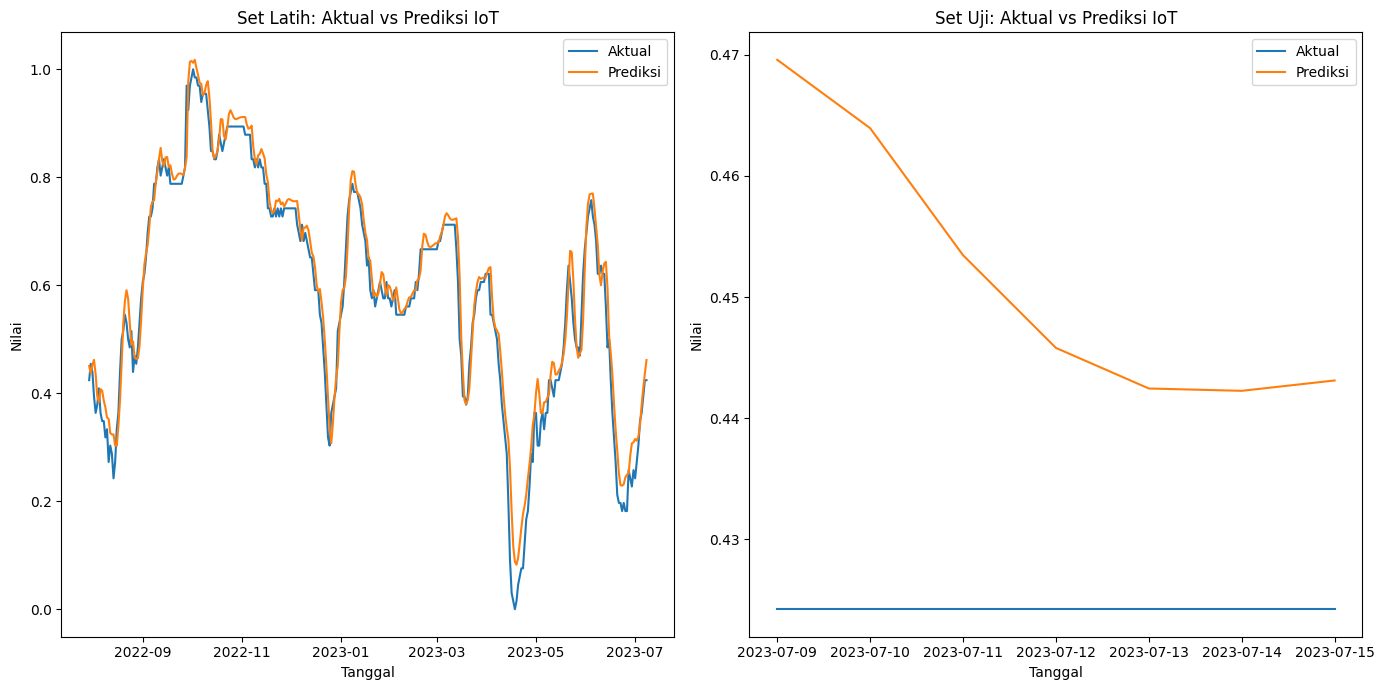

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['iot']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 10
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Memplot nilai aktual vs prediksi untuk set latih dan uji
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.subplot(1, 2, 1)
plt.plot(dates[:train_size], y_train, label='Aktual')
plt.plot(dates[:train_size], train_predicted, label='Prediksi')
plt.title('Set Latih: Aktual vs Prediksi IoT')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

# Memplot prediksi uji
plt.subplot(1, 2, 2)
plt.plot(dates[train_size:], y_test, label='Aktual')
plt.plot(dates[train_size:], test_predicted, label='Prediksi')
plt.title('Set Uji: Aktual vs Prediksi IoT')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

plt.tight_layout()
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 4s 116ms/step - loss: 0.3128 - mae: 0.5245 - mape: 77.7926 - val_loss: 0.0292 - val_mae: 0.1488 - val_mape: 2848066.5000
Epoch 2/250
8/8 [==============================] - 0s 13ms/step - loss: 0.0420 - mae: 0.1721 - mape: 28.7539 - val_loss: 0.0603 - val_mae: 0.1884 - val_mape: 5130362.5000
Epoch 3/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0177 - mae: 0.1050 - mape: 18.2003 - val_loss: 0.0213 - val_mae: 0.1182 - val_mape: 3337063.5000
Epoch 4/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0199 - mae: 0.1217 - mape: 18.3691 - val_loss: 0.0256 - val_mae: 0.1175 - val_mape: 3913471.0000
Epoch 5/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0107 - mae: 0.0776 - mape: 14.6047 - val_loss: 0.0373 - val_mae: 0.1418 - val_mape: 4442665.5000
Epoch 6/250
8/8 [==============================] - 0s 14ms/step - loss: 0.0108 - mae: 0.0777 - mape:

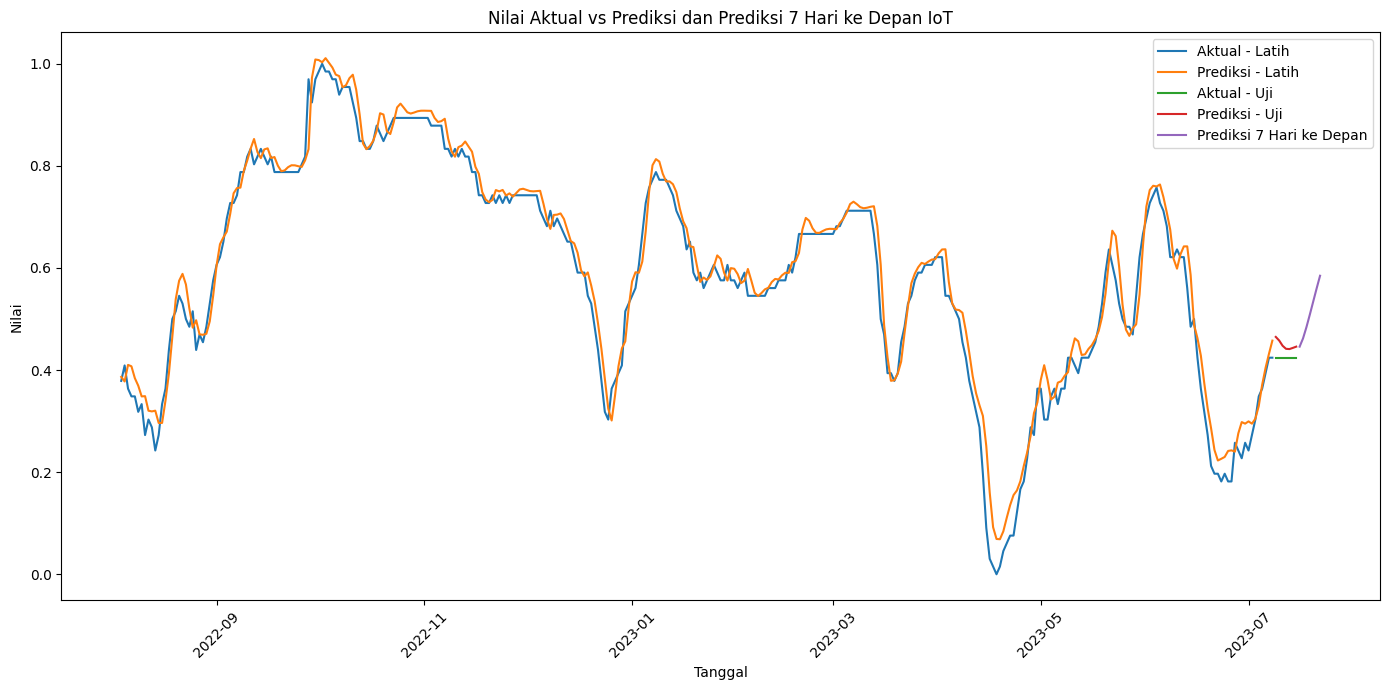

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import timedelta, datetime

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['iot']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Mengembalikan skala y_train dan y_test ke skala asli
y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = model.predict(current_sequence.reshape((1, lag, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 7 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = data.index[-1]

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

# Memplot nilai aktual vs prediksi untuk set latih dan uji, serta prediksi masa depan
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.plot(dates[:train_size], y_train, label='Aktual - Latih')
plt.plot(dates[:train_size], train_predicted, label='Prediksi - Latih')

# Memplot prediksi uji
plt.plot(dates[train_size:], y_test, label='Aktual - Uji')
plt.plot(dates[train_size:], test_predicted, label='Prediksi - Uji')

# Memplot prediksi masa depan
plt.plot(future_dates, future_predictions, label='Prediksi 7 Hari ke Depan')

plt.title('Nilai Aktual vs Prediksi dan Prediksi 7 Hari ke Depan IoT')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import timedelta, datetime

# Memilih kolom target
data_series = data['vending machine']

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = regressorLSTM.predict(current_sequence.reshape((1, 15, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 10 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = datetime.strptime('20230715', '%Y%m%d')

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

1/1 [==============================] - 0s 26ms/step
        Date  Predicted Value
0 2023-07-16        63.427822
1 2023-07-17        64.492722
2 2023-07-18        65.946762
3 2023-07-19        67.577225
4 2023-07-20        69.273453
5 2023-07-21        70.964935
6 2023-07-22        72.595688


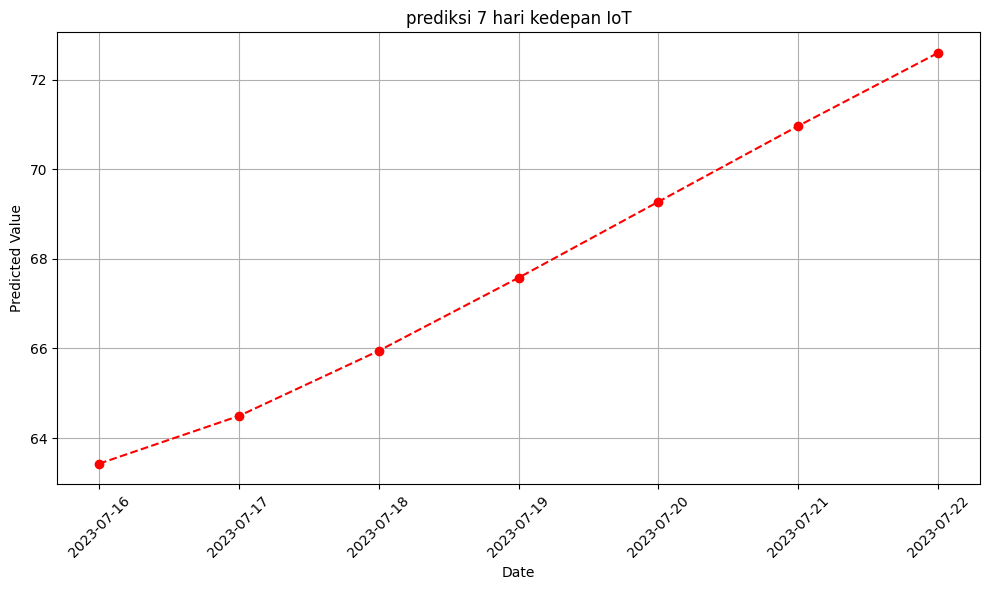

In [ ]:
# Plot the future predictions
# Memilih kolom target
data_series = data['iot']

plt.figure(figsize=(10, 6))
plt.plot(future_predictions_with_dates['Date'], future_predictions_with_dates['Predicted Value'], marker='o', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('prediksi 7 hari kedepan IoT')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


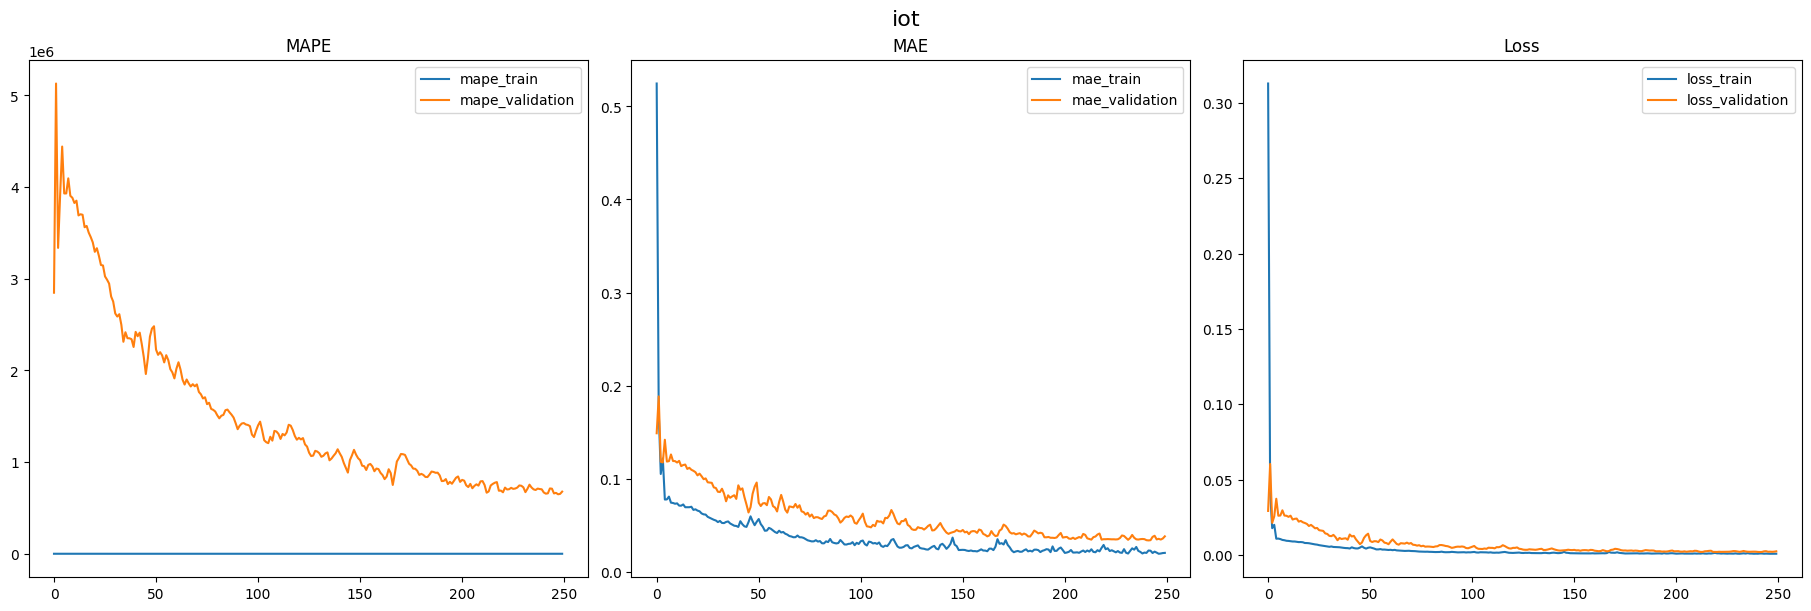

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('iot', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_ru.png')

plt.show()

## Machine Learning

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

Jumlah nilai yang tidak valid dalam 'machine learning': 0


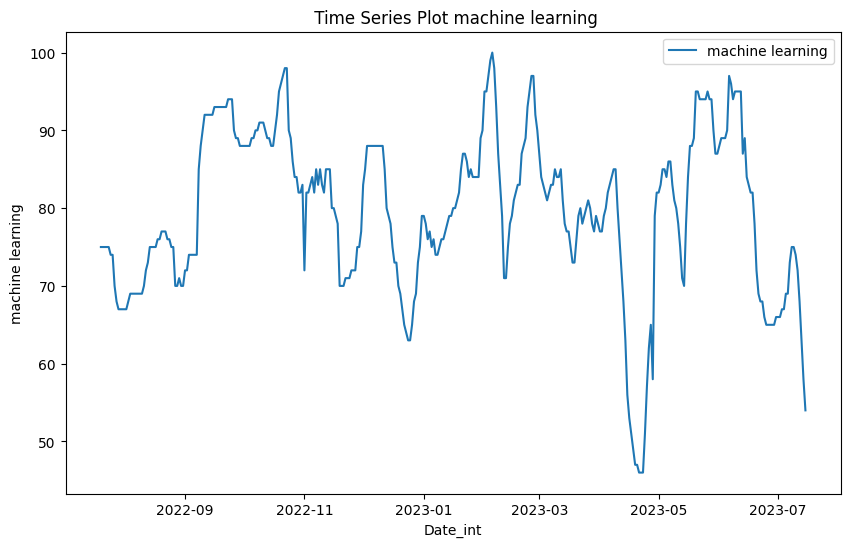

In [ ]:
# Ubah tipe data kolom 'Tanggal' ke tipe data datetime jika perlu
data['Date_int'] = pd.to_datetime(data['Date_int'])

# Periksa apakah ada nilai yang tidak valid
invalid_values = data['machine learning'].isna().sum()
print(f"Jumlah nilai yang tidak valid dalam 'machine learning': {invalid_values}")

# Jika ada nilai yang tidak valid, tangani sesuai
if invalid_values > 0:
    # Misalnya, Anda bisa menghapus baris yang mengandung nilai-nilai tersebut
    data = data.dropna(subset=['machine learning'])
    print("Nilai yang tidak valid telah dihapus.")

# Sekarang coba plot kembali
plt.figure(figsize=(10, 6))
plt.plot(data['Date_int'], data['machine learning'], label='machine learning')
plt.title(' Time Series Plot machine learning')
plt.xlabel('Date_int')
plt.ylabel('machine learning')
plt.legend()
plt.show()

In [ ]:
data.iloc[:1]

Date_int       Date  User  New User  Real User           Keyword  \
0 2022-07-20  20-Jul-22   104        96        200  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
# Setting 353 percent data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["machine learning"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.53703704]
 [0.53703704]
 [0.53703704]
 [0.53703704]
 [0.53703704]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["machine learning"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[1.] [1.] [0.95238095] [0.85714286] [0.66666667]


#ACF & PACF


<Figure size 1000x600 with 0 Axes>

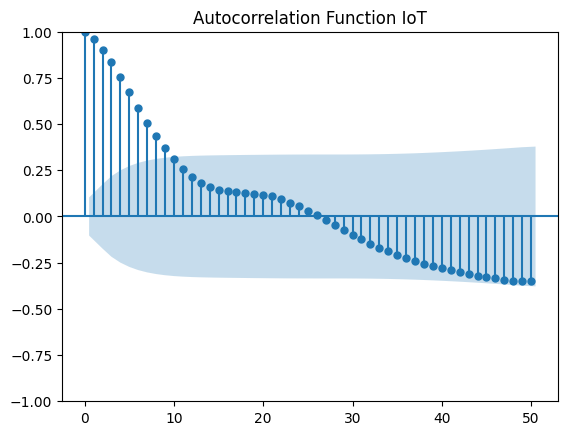

<Figure size 1000x600 with 0 Axes>

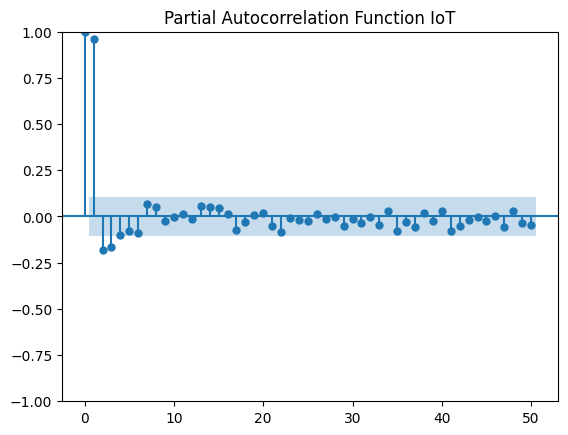

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Memuat data tanpa mengonversi kolom tanggal
data = pd.read_csv('merged_data3.csv')

# Mengonversi kolom 'Date' ke format datetime dengan format yang sesuai
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menentukan kolom tanggal sebagai index
data.set_index('Date_int', inplace=True)

# Memilih kolom yang dibutuhkan
data_series = data['machine learning']

# Plot ACF
plt.figure(figsize=(10,6))
plot_acf(data_series, lags=50)
plt.title('Autocorrelation Function IoT')
plt.show()

# Plot PACF
plt.figure(figsize=(10,6))
plot_pacf(data_series, lags=50)
plt.title('Partial Autocorrelation Function IoT')
plt.show()


Total data: 341
Data latih: 334
Data uji: 7
Epoch 1/250
8/8 [==============================] - 7s 361ms/step - loss: 0.1671 - mae: 0.3391 - mape: 49.8519 - val_loss: 0.1307 - val_mae: 0.3069 - val_mape: 18421650.0000
Epoch 2/250
8/8 [==============================] - 0s 52ms/step - loss: 0.0514 - mae: 0.1760 - mape: 30.6476 - val_loss: 0.0472 - val_mae: 0.1799 - val_mape: 10585749.0000
Epoch 3/250
8/8 [==============================] - 0s 51ms/step - loss: 0.0262 - mae: 0.1337 - mape: 19.3098 - val_loss: 0.0450 - val_mae: 0.1745 - val_mape: 10616884.0000
Epoch 4/250
8/8 [==============================] - 0s 43ms/step - loss: 0.0167 - mae: 0.1025 - mape: 16.7174 - val_loss: 0.0533 - val_mae: 0.1791 - val_mape: 13300679.0000
Epoch 5/250
8/8 [==============================] - 0s 34ms/step - loss: 0.0171 - mae: 0.1014 - mape: 17.4536 - val_loss: 0.0441 - val_mae: 0.1652 - val_mape: 11805126.0000
Epoch 6/250
8/8 [==============================] - 0s 38ms/step - loss: 0.0148 - mae: 0.0945 - 

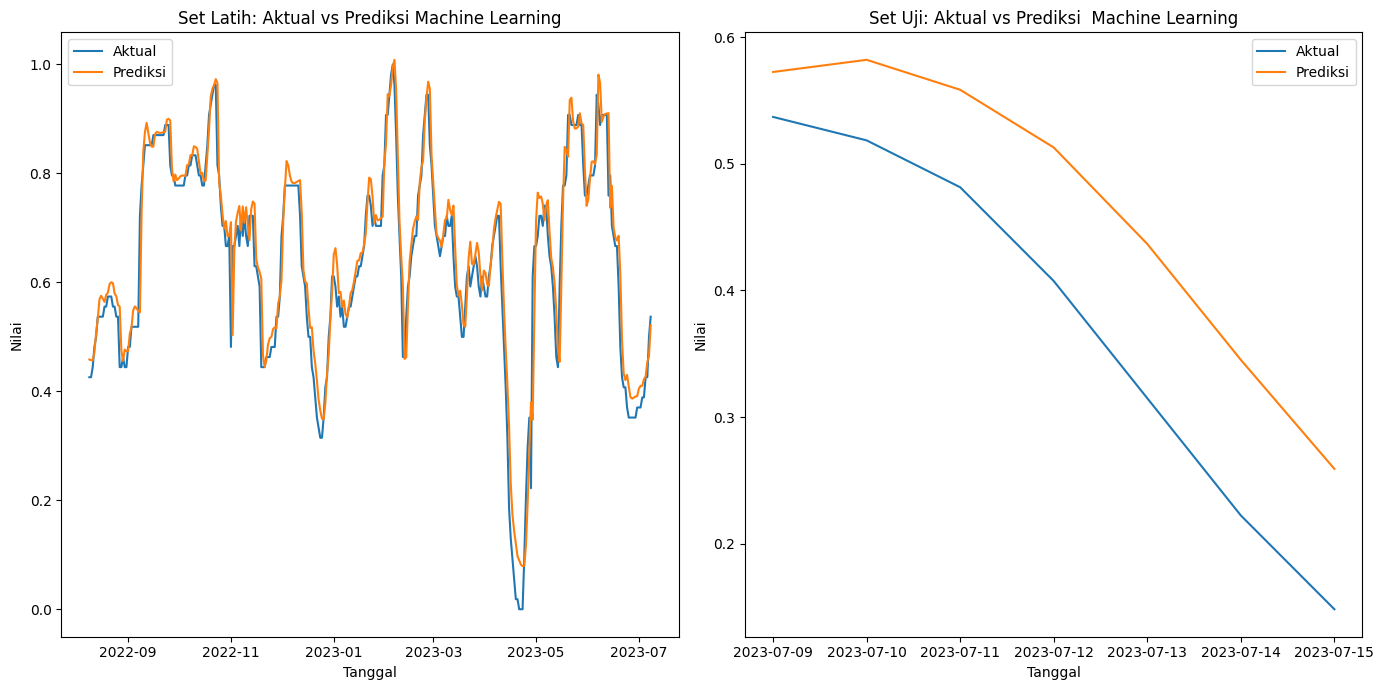

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['machine learning']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 20
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Memplot nilai aktual vs prediksi untuk set latih dan uji
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.subplot(1, 2, 1)
plt.plot(dates[:train_size], y_train, label='Aktual')
plt.plot(dates[:train_size], train_predicted, label='Prediksi')
plt.title('Set Latih: Aktual vs Prediksi Machine Learning')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

# Memplot prediksi uji
plt.subplot(1, 2, 2)
plt.plot(dates[train_size:], y_test, label='Aktual')
plt.plot(dates[train_size:], test_predicted, label='Prediksi')
plt.title('Set Uji: Aktual vs Prediksi  Machine Learning')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

plt.tight_layout()
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 8s 444ms/step - loss: 0.2558 - mae: 0.4562 - mape: 67.5830 - val_loss: 0.0495 - val_mae: 0.1755 - val_mape: 11444150.0000
Epoch 2/250
8/8 [==============================] - 0s 31ms/step - loss: 0.0424 - mae: 0.1689 - mape: 29.2214 - val_loss: 0.0588 - val_mae: 0.1878 - val_mape: 13193367.0000
Epoch 3/250
8/8 [==============================] - 0s 21ms/step - loss: 0.0198 - mae: 0.1108 - mape: 17.6100 - val_loss: 0.0471 - val_mae: 0.1796 - val_mape: 9383176.0000
Epoch 4/250
8/8 [==============================] - 0s 21ms/step - loss: 0.0208 - mae: 0.1170 - mape: 17.3051 - val_loss: 0.0450 - val_mae: 0.1652 - val_mape: 11498931.0000
Epoch 5/250
8/8 [==============================] - 0s 25ms/step - loss: 0.0161 - mae: 0.0991 - mape: 17.0868 - val_loss: 0.0483 - val_mae: 0.1713 - val_mape: 12118980.0000
Epoch 6/250
8/8 [==============================] - 0s 31ms/step - loss: 0.0155 - mae: 0.0969 - m

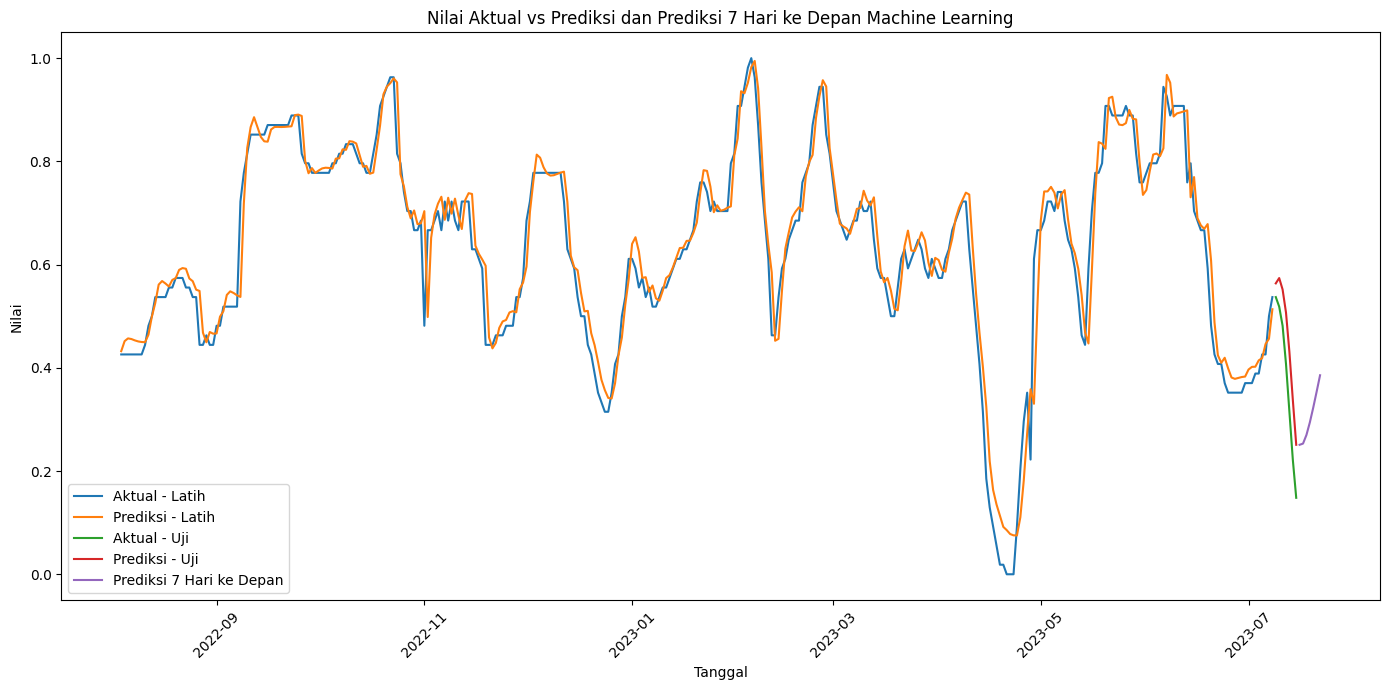

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import timedelta, datetime

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['machine learning']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Mengembalikan skala y_train dan y_test ke skala asli
y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = model.predict(current_sequence.reshape((1, lag, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 7 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = data.index[-1]

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

# Memplot nilai aktual vs prediksi untuk set latih dan uji, serta prediksi masa depan
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.plot(dates[:train_size], y_train, label='Aktual - Latih')
plt.plot(dates[:train_size], train_predicted, label='Prediksi - Latih')

# Memplot prediksi uji
plt.plot(dates[train_size:], y_test, label='Aktual - Uji')
plt.plot(dates[train_size:], test_predicted, label='Prediksi - Uji')

# Memplot prediksi masa depan
plt.plot(future_dates, future_predictions, label='Prediksi 7 Hari ke Depan')

plt.title('Nilai Aktual vs Prediksi dan Prediksi 7 Hari ke Depan Machine Learning')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import timedelta, datetime

# Memilih kolom target
data_series = data['machine learning']

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = regressorLSTM.predict(current_sequence.reshape((1, 15, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 10 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = datetime.strptime('20230715', '%Y%m%d')

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

1/1 [==============================] - 0s 33ms/step
        Date  Predicted Value
0 2023-07-16        59.546791
1 2023-07-17        59.672539
2 2023-07-18        60.572460
3 2023-07-19        61.887684
4 2023-07-20        63.439041
5 2023-07-21        65.108490
6 2023-07-22        66.821236


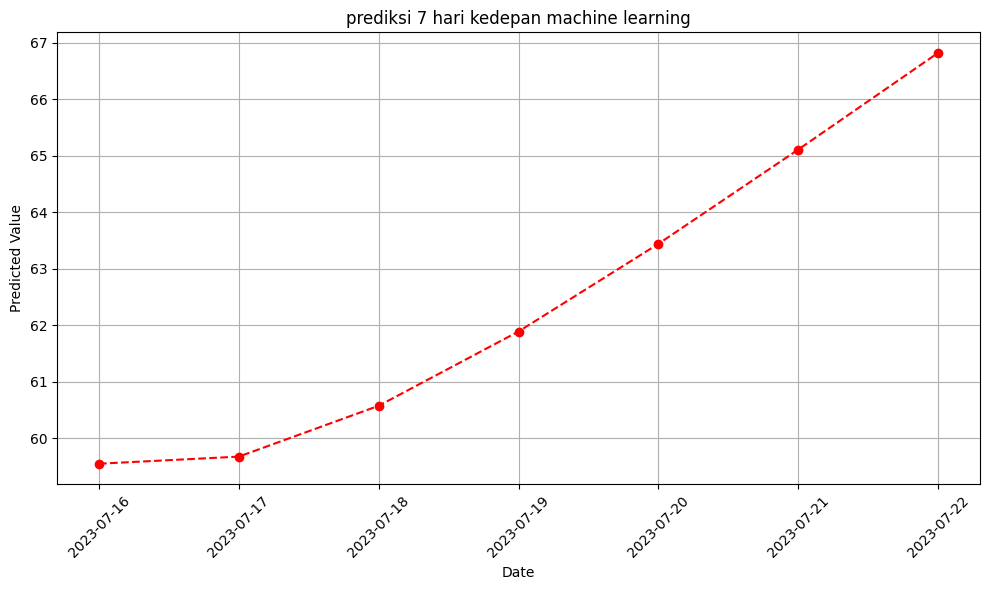

In [ ]:
# Plot the future predictions
# Memilih kolom target
data_series = data['machine learning']

plt.figure(figsize=(10, 6))
plt.plot(future_predictions_with_dates['Date'], future_predictions_with_dates['Predicted Value'], marker='o', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('prediksi 7 hari kedepan machine learning')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


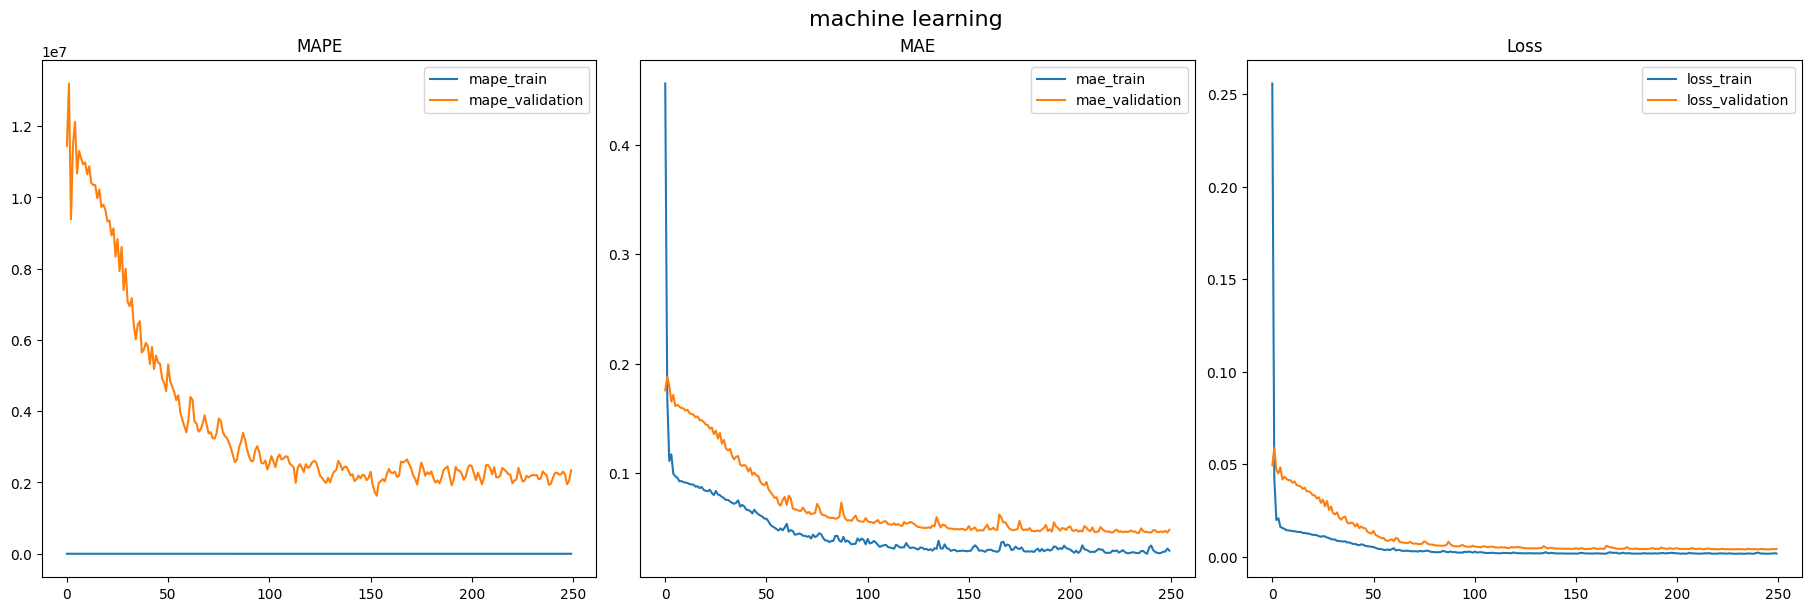

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('machine learning', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_ml.png')

plt.show()

## Bisnis Digital

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

Jumlah nilai yang tidak valid dalam 'bisnis digital': 0


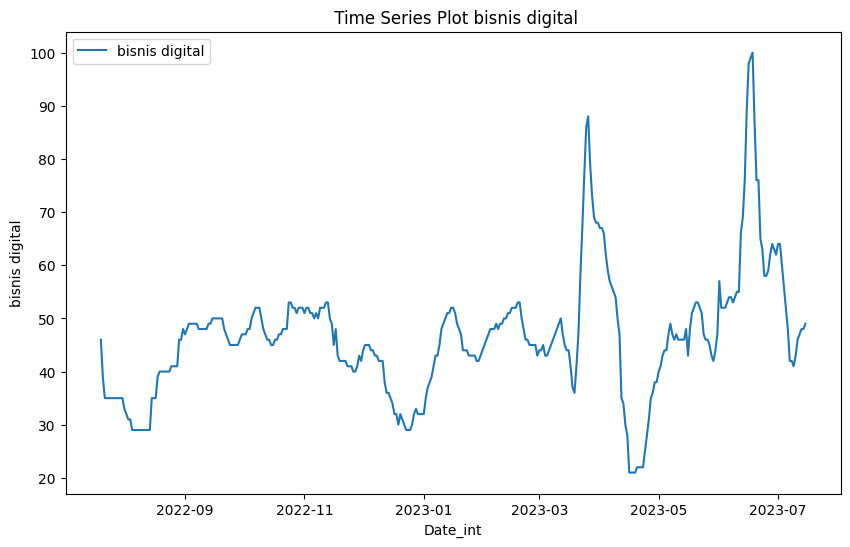

In [ ]:
# Ubah tipe data kolom 'Tanggal' ke tipe data datetime jika perlu
data['Date_int'] = pd.to_datetime(data['Date_int'])

# Periksa apakah ada nilai yang tidak valid
invalid_values = data['bisnis digital'].isna().sum()
print(f"Jumlah nilai yang tidak valid dalam 'bisnis digital': {invalid_values}")

# Jika ada nilai yang tidak valid, tangani sesuai
if invalid_values > 0:
    # Misalnya, Anda bisa menghapus baris yang mengandung nilai-nilai tersebut
    data = data.dropna(subset=['bisnis digital'])
    print("Nilai yang tidak valid telah dihapus.")

# Sekarang coba plot kembali
plt.figure(figsize=(10, 6))
plt.plot(data['Date_int'], data['bisnis digital'], label='bisnis digital')
plt.title(' Time Series Plot bisnis digital')
plt.xlabel('Date_int')
plt.ylabel('bisnis digital')
plt.legend()
plt.show()

In [ ]:
data.iloc[:1]

Date_int       Date  User  New User  Real User           Keyword  \
0 2022-07-20  20-Jul-22   104        96        200  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
# Setting 353 data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["bisnis digital"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.3164557 ]
 [0.2278481 ]
 [0.17721519]
 [0.17721519]
 [0.17721519]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["bisnis digital"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.125] [0.] [0.25] [0.625] [0.75]


#ACF & PACF


<Figure size 1000x600 with 0 Axes>

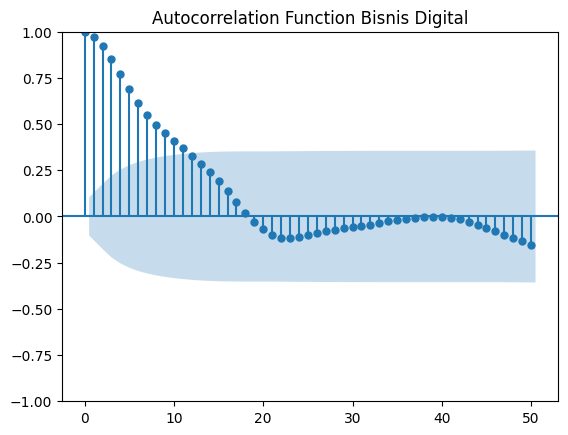

<Figure size 1000x600 with 0 Axes>

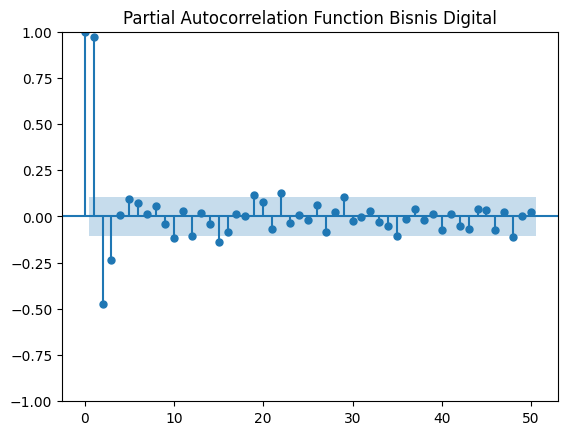

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Memuat data tanpa mengonversi kolom tanggal
data = pd.read_csv('merged_data3.csv')

# Mengonversi kolom 'Date' ke format datetime dengan format yang sesuai
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menentukan kolom tanggal sebagai index
data.set_index('Date_int', inplace=True)

# Memilih kolom yang dibutuhkan
data_series = data['bisnis digital']

# Plot ACF
plt.figure(figsize=(10,6))
plot_acf(data_series, lags=50)
plt.title('Autocorrelation Function Bisnis Digital')
plt.show()

# Plot PACF
plt.figure(figsize=(10,6))
plot_pacf(data_series, lags=50)
plt.title('Partial Autocorrelation Function Bisnis Digital')
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 4s 114ms/step - loss: 0.0493 - mae: 0.1811 - mape: 58.1476 - val_loss: 0.0348 - val_mae: 0.1357 - val_mape: 15930768.0000
Epoch 2/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0136 - mae: 0.0966 - mape: 41.5751 - val_loss: 0.0271 - val_mae: 0.1154 - val_mape: 12421460.0000
Epoch 3/250
8/8 [==============================] - 0s 15ms/step - loss: 0.0091 - mae: 0.0651 - mape: 23.1309 - val_loss: 0.0309 - val_mae: 0.1278 - val_mape: 10145220.0000
Epoch 4/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0080 - mae: 0.0601 - mape: 22.7223 - val_loss: 0.0255 - val_mae: 0.1113 - val_mape: 12697531.0000
Epoch 5/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0074 - mae: 0.0572 - mape: 25.5349 - val_loss: 0.0250 - val_mae: 0.1100 - val_mape: 12355475.0000
Epoch 6/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0068 - mae: 0.0535 - 

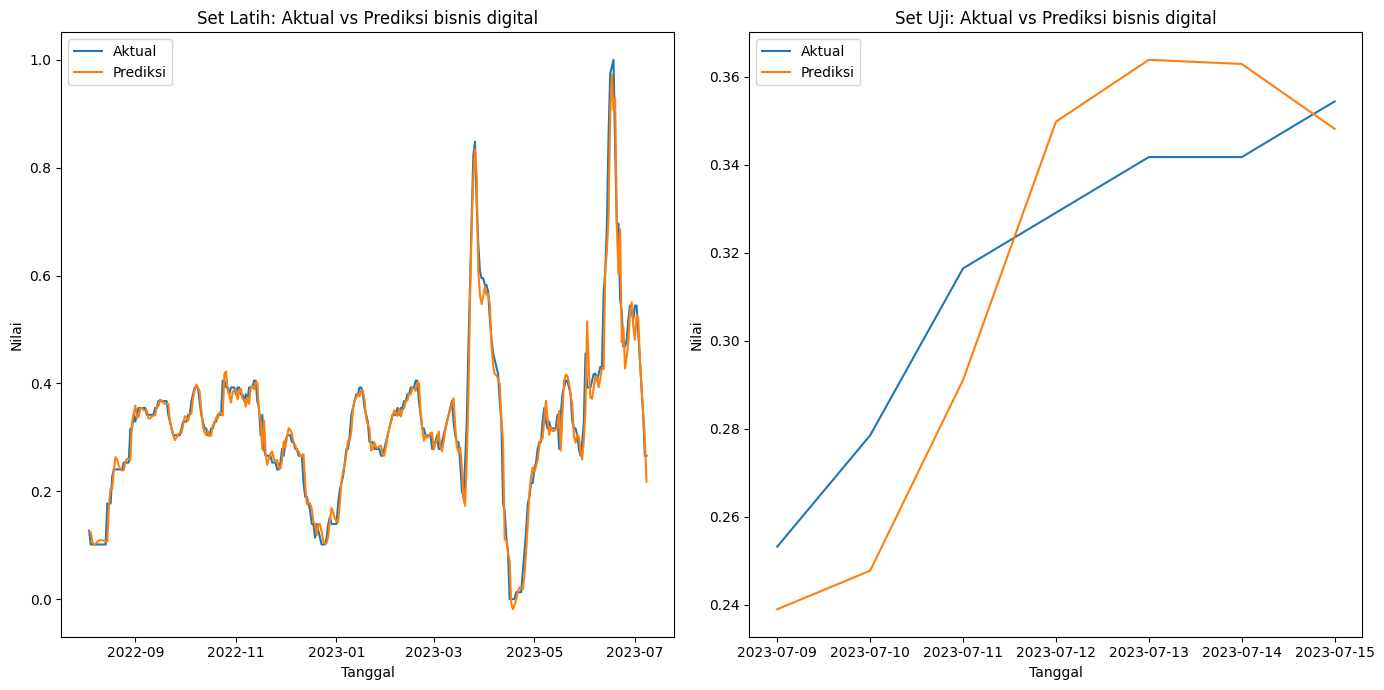

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['bisnis digital']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Memplot nilai aktual vs prediksi untuk set latih dan uji
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.subplot(1, 2, 1)
plt.plot(dates[:train_size], y_train, label='Aktual')
plt.plot(dates[:train_size], train_predicted, label='Prediksi')
plt.title('Set Latih: Aktual vs Prediksi bisnis digital')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

# Memplot prediksi uji
plt.subplot(1, 2, 2)
plt.plot(dates[train_size:], y_test, label='Aktual')
plt.plot(dates[train_size:], test_predicted, label='Prediksi')
plt.title('Set Uji: Aktual vs Prediksi bisnis digital')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

plt.tight_layout()
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 5s 113ms/step - loss: 0.0472 - mae: 0.1768 - mape: 56.7838 - val_loss: 0.0339 - val_mae: 0.1341 - val_mape: 15425014.0000
Epoch 2/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0141 - mae: 0.0982 - mape: 41.9637 - val_loss: 0.0270 - val_mae: 0.1168 - val_mape: 12473329.0000
Epoch 3/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0087 - mae: 0.0643 - mape: 23.0823 - val_loss: 0.0309 - val_mae: 0.1281 - val_mape: 10011510.0000
Epoch 4/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0081 - mae: 0.0600 - mape: 22.1901 - val_loss: 0.0256 - val_mae: 0.1123 - val_mape: 12678039.0000
Epoch 5/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0074 - mae: 0.0578 - mape: 25.5259 - val_loss: 0.0249 - val_mae: 0.1106 - val_mape: 12235361.0000
Epoch 6/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0068 - mae: 0.0537 - 

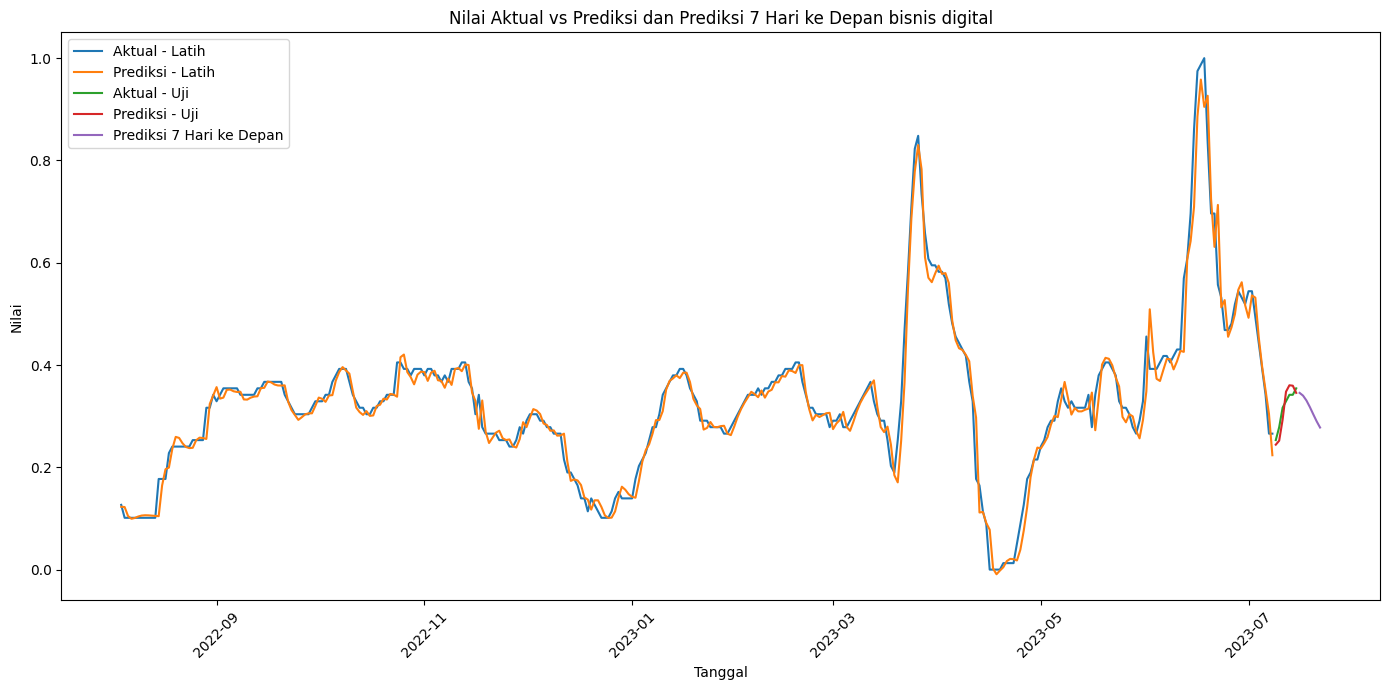

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import timedelta, datetime

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['bisnis digital']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Mengembalikan skala y_train dan y_test ke skala asli
y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = model.predict(current_sequence.reshape((1, lag, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 7 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = data.index[-1]

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

# Memplot nilai aktual vs prediksi untuk set latih dan uji, serta prediksi masa depan
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.plot(dates[:train_size], y_train, label='Aktual - Latih')
plt.plot(dates[:train_size], train_predicted, label='Prediksi - Latih')

# Memplot prediksi uji
plt.plot(dates[train_size:], y_test, label='Aktual - Uji')
plt.plot(dates[train_size:], test_predicted, label='Prediksi - Uji')

# Memplot prediksi masa depan
plt.plot(future_dates, future_predictions, label='Prediksi 7 Hari ke Depan')

plt.title('Nilai Aktual vs Prediksi dan Prediksi 7 Hari ke Depan bisnis digital')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import timedelta, datetime

# Memilih kolom target
data_series = data['bisnis digital']

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = regressorLSTM.predict(current_sequence.reshape((1, 15, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 10 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = datetime.strptime('20230715', '%Y%m%d')

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

1/1 [==============================] - 0s 17ms/step
        Date  Predicted Value
0 2023-07-16        48.294022
1 2023-07-17        47.874420
2 2023-07-18        47.121983
3 2023-07-19        46.114513
4 2023-07-20        44.997887
5 2023-07-21        43.906456
6 2023-07-22        42.945507


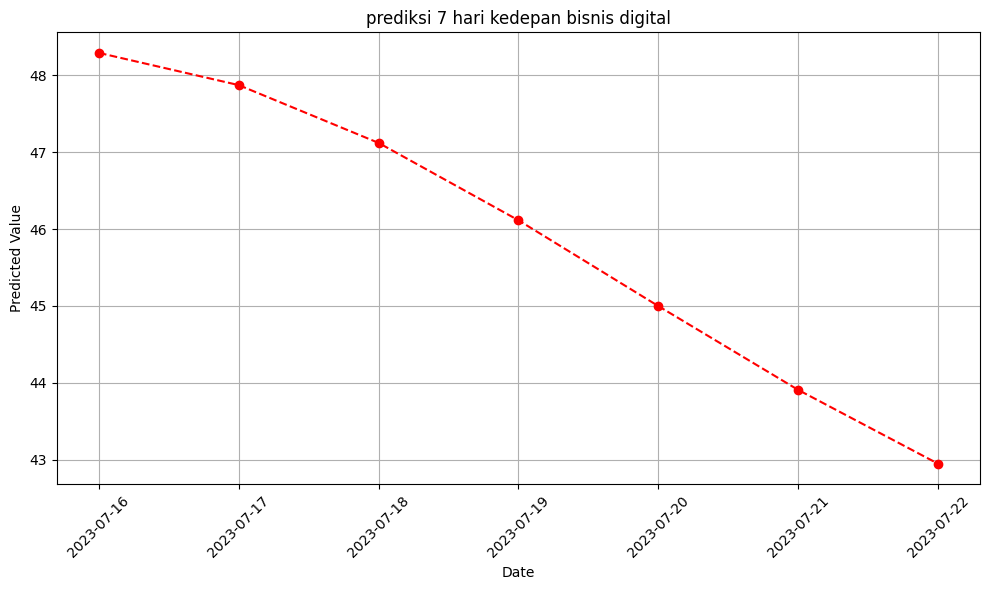

In [ ]:
# Plot the future predictions
# Memilih kolom target
data_series = data['bisnis digital']

plt.figure(figsize=(10, 6))
plt.plot(future_predictions_with_dates['Date'], future_predictions_with_dates['Predicted Value'], marker='o', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('prediksi 7 hari kedepan bisnis digital')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


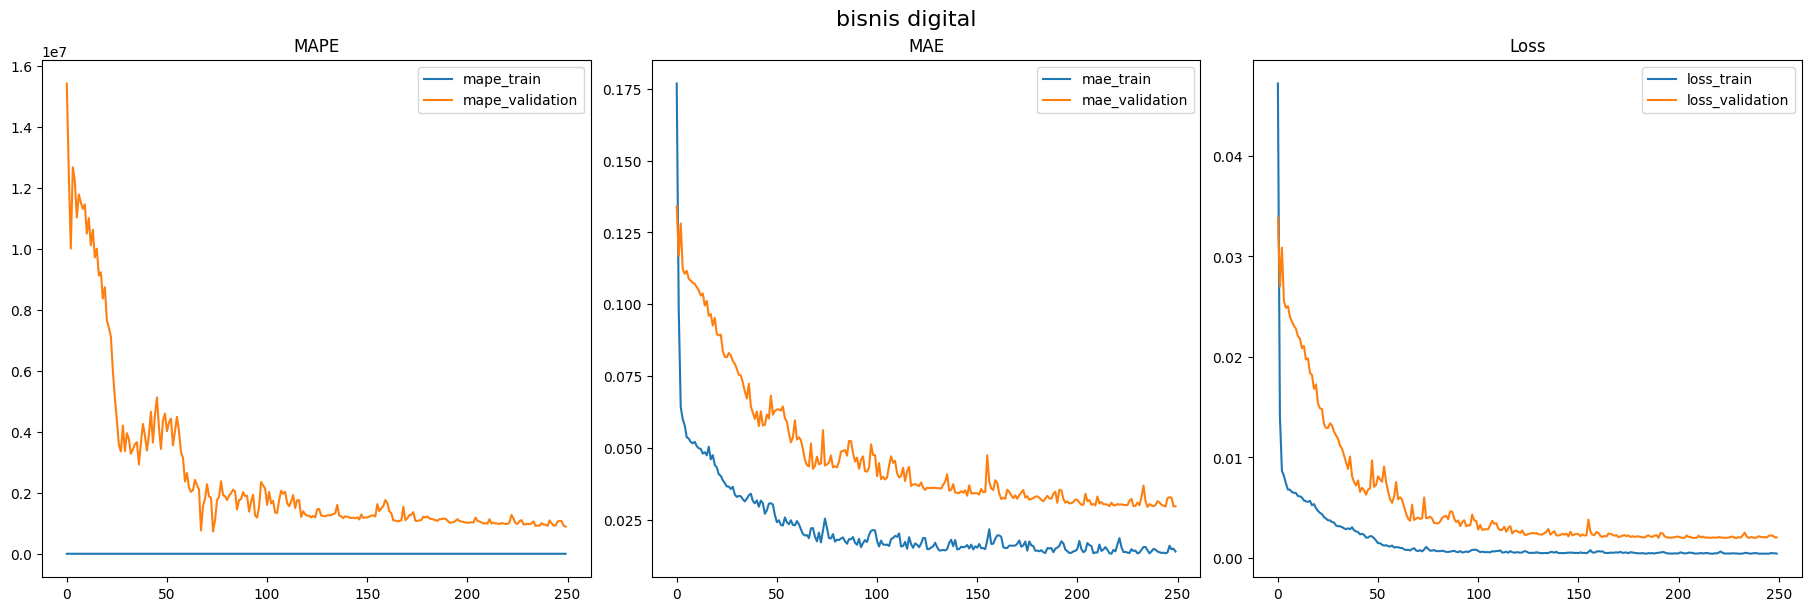

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('bisnis digital', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_bd.png')

plt.show()

## Kecerdasan Buatan

In [ ]:
import pandas as pd

data = pd.read_csv("merged_data3.csv")

In [ ]:
data.head()

Date   Date_int  User  New User  Real User           Keyword  \
0  20-Jul-22  7/20/2022   104        96        200  Machine Learning   
1  21-Jul-22  7/21/2022    73        66        139  Machine Learning   
2  22-Jul-22  7/22/2022    63        61        124  Machine Learning   
3  23-Jul-22  7/23/2022    48        45         93  Machine Learning   
4  24-Jul-22  7/24/2022    38        37         75  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35  
1               50   68                75              39                 30  
2               40   70                75              35                 25  
3               25   73                75              35                 25  
4                0   73                75              35                 25

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,  Dropout, Dense
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import datetime as dt
import math
from keras.layers import GRU, Bidirectional
from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam, Adamax
from keras.losses import MeanAbsolutePercentageError
from datetime import timedelta, datetime
import matplotlib.dates as mdates

In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime( month=month, day=day, year=year)

datetime_object = str_to_datetime('7/20/2022')
datetime_object

datetime.datetime(2022, 7, 20, 0, 0)

In [ ]:
data['Date_int'] = data['Date_int'].apply(str_to_datetime)
data['Date_int']

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
data.index = data.pop('Date_int')
data = data.reset_index()

In [ ]:
data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39  

[361 rows x 11 columns]

Jumlah nilai yang tidak valid dalam 'kecerdasan buatan': 0


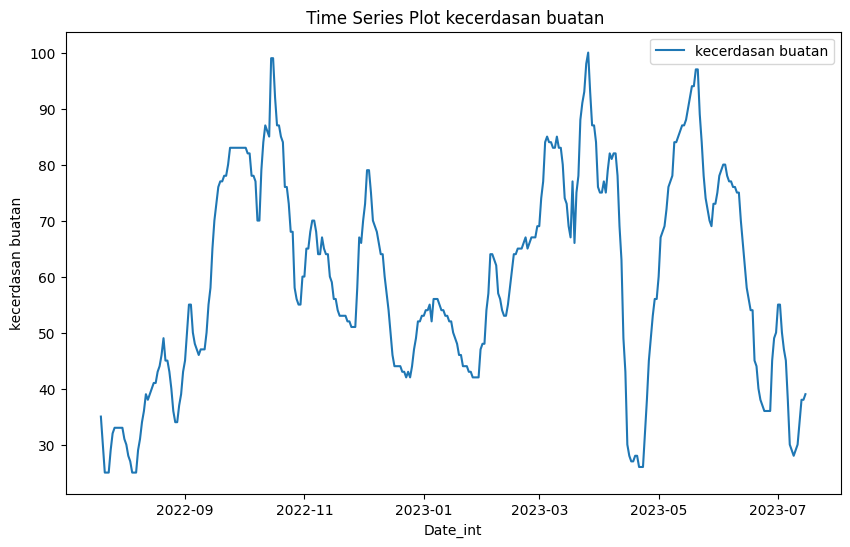

In [ ]:
# Ubah tipe data kolom 'Tanggal' ke tipe data datetime jika perlu
data['Date_int'] = pd.to_datetime(data['Date_int'])

# Periksa apakah ada nilai yang tidak valid
invalid_values = data['kecerdasan buatan'].isna().sum()
print(f"Jumlah nilai yang tidak valid dalam 'kecerdasan buatan': {invalid_values}")

# Jika ada nilai yang tidak valid, tangani sesuai
if invalid_values > 0:
    # Misalnya, Anda bisa menghapus baris yang mengandung nilai-nilai tersebut
    data = data.dropna(subset=['kecerdasan buatan'])
    print("Nilai yang tidak valid telah dihapus.")

# Sekarang coba plot kembali
plt.figure(figsize=(10, 6))
plt.plot(data['Date_int'], data['kecerdasan buatan'], label='kecerdasan buatan')
plt.title(' Time Series Plot kecerdasan buatan')
plt.xlabel('Date_int')
plt.ylabel('kecerdasan buatan')
plt.legend()
plt.show()

In [ ]:
data.iloc[:1]

Date_int       Date  User  New User  Real User           Keyword  \
0 2022-07-20  20-Jul-22   104        96        200  Machine Learning   

   vending machine  iot  machine learning  bisnis digital  kecerdasan buatan  
0               40   69                75              46                 35

In [ ]:
data["Date_int"]

0     2022-07-20
1     2022-07-21
2     2022-07-22
3     2022-07-23
4     2022-07-24
         ...    
356   2023-07-11
357   2023-07-12
358   2023-07-13
359   2023-07-14
360   2023-07-15
Name: Date_int, Length: 361, dtype: datetime64[ns]

In [ ]:
# Setting 353 data for training
training_data_len = 353
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:11]
test_data = data[training_data_len:].iloc[:,:11]
print(train_data.shape, test_data.shape)

(353, 11) (8, 11)


In [ ]:
train_data

Date_int       Date  User  New User  Real User  \
0   2022-07-20  20-Jul-22   104        96        200   
1   2022-07-21  21-Jul-22    73        66        139   
2   2022-07-22  22-Jul-22    63        61        124   
3   2022-07-23  23-Jul-22    48        45         93   
4   2022-07-24  24-Jul-22    38        37         75   
..         ...        ...   ...       ...        ...   
348 2023-07-03   3-Jul-23   107       101        208   
349 2023-07-04   4-Jul-23    94        87        181   
350 2023-07-05   5-Jul-23   151       137        288   
351 2023-07-06   6-Jul-23   127       119        246   
352 2023-07-07   7-Jul-23   114       109        223   

                          Keyword  vending machine  iot  machine learning  \
0                Machine Learning               40   69                75   
1                Machine Learning               50   68                75   
2                Machine Learning               40   70                75   
3                Machine Learning               25   73                75   
4                Machine Learning                0   73                75   
..                            ...              ...  ...               ...   
348  Manfaat Kiosk untuk Restoran                0   54                67   
349  Manfaat Kiosk untuk Restoran                0   57                67   
350  Manfaat Kiosk untuk Restoran                0   58                69   
351  Manfaat Kiosk untuk Restoran                0   60                69   
352  Manfaat Kiosk untuk Restoran                0   62                73   

     bisnis digital  kecerdasan buatan  
0                46                 35  
1                39                 30  
2                35                 25  
3                35                 25  
4                35                 25  
..              ...                ...  
348              60                 50  
349              56                 47  
350              52                 45  
351              48                 38  
352              42                 30  

[353 rows x 11 columns]

In [ ]:
test_data

Date_int       Date  User  New User  Real User  \
353 2023-07-08   8-Jul-23   132       125        257   
354 2023-07-09   9-Jul-23   153       144        297   
355 2023-07-10  10-Jul-23    91        83        174   
356 2023-07-11  11-Jul-23   102        95        197   
357 2023-07-12  12-Jul-23   171       160        331   
358 2023-07-13  13-Jul-23   207       192        399   
359 2023-07-14  14-Jul-23   190       169        359   
360 2023-07-15  15-Jul-23   164       150        314   

                          Keyword  vending machine  iot  machine learning  \
353  Manfaat Kiosk untuk Restoran                0   62                75   
354  Manfaat Kiosk untuk Restoran                0   62                75   
355  Manfaat Kiosk untuk Restoran                0   62                74   
356  Manfaat Kiosk untuk Restoran                0   62                72   
357  Manfaat Kiosk untuk Restoran                0   62                68   
358  Manfaat Kiosk untuk Restoran                0   62                63   
359  Manfaat Kiosk untuk Restoran                0   62                58   
360  Manfaat Kiosk untuk Restoran                0   62                54   

     bisnis digital  kecerdasan buatan  
353              42                 29  
354              41                 28  
355              43                 29  
356              46                 30  
357              47                 34  
358              48                 38  
359              48                 38  
360              49                 39

In [ ]:
# Selecting Open Price values
dataset_train = train_data["kecerdasan buatan"].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(353, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.13333333]
 [0.06666667]
 [0.        ]
 [0.        ]
 [0.        ]]


In [ ]:
# Selecting Open Price values
dataset_test = test_data["kecerdasan buatan"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.09090909] [0.] [0.09090909] [0.18181818] [0.54545455]


#ACF & PACF


<Figure size 1000x600 with 0 Axes>

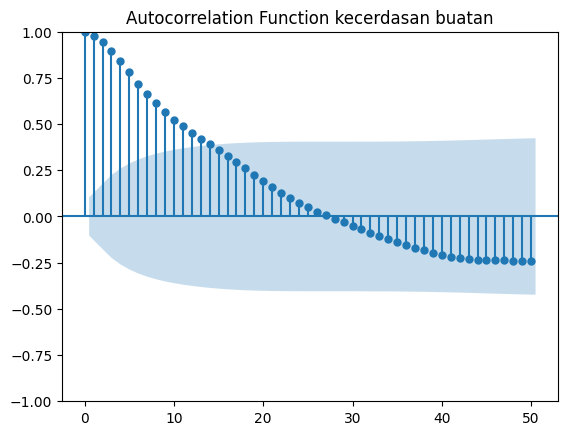

<Figure size 1000x600 with 0 Axes>

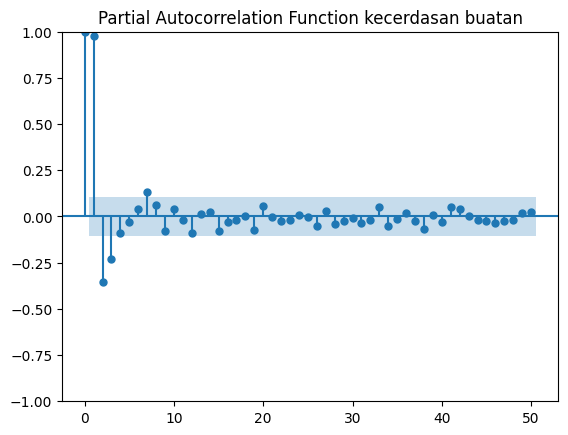

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Memuat data tanpa mengonversi kolom tanggal
data = pd.read_csv('merged_data3.csv')

# Mengonversi kolom 'Date' ke format datetime dengan format yang sesuai
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menentukan kolom tanggal sebagai index
data.set_index('Date_int', inplace=True)

# Memilih kolom yang dibutuhkan
data_series = data['kecerdasan buatan']

# Plot ACF
plt.figure(figsize=(10,6))
plot_acf(data_series, lags=50)
plt.title('Autocorrelation Function kecerdasan buatan')
plt.show()

# Plot PACF
plt.figure(figsize=(10,6))
plot_pacf(data_series, lags=50)
plt.title('Partial Autocorrelation Function kecerdasan buatan')
plt.show()


Total data: 341
Data latih: 334
Data uji: 7
Epoch 1/250
8/8 [==============================] - 4s 116ms/step - loss: 0.2031 - mae: 0.3860 - mape: 75.4144 - val_loss: 0.0605 - val_mae: 0.2036 - val_mape: 202.5096
Epoch 2/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0316 - mae: 0.1423 - mape: 39.1985 - val_loss: 0.0831 - val_mae: 0.2354 - val_mape: 282.4258
Epoch 3/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0209 - mae: 0.1155 - mape: 28.8825 - val_loss: 0.0514 - val_mae: 0.1892 - val_mape: 186.4405
Epoch 4/250
8/8 [==============================] - 0s 12ms/step - loss: 0.0215 - mae: 0.1158 - mape: 24.8745 - val_loss: 0.0526 - val_mae: 0.1816 - val_mape: 216.4560
Epoch 5/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0183 - mae: 0.1090 - mape: 28.6978 - val_loss: 0.0576 - val_mae: 0.1884 - val_mape: 230.8228
Epoch 6/250
8/8 [==============================] - 0s 11ms/step - loss: 0.0171 - mae: 0.1045 - mape: 26.5949 - val_loss:

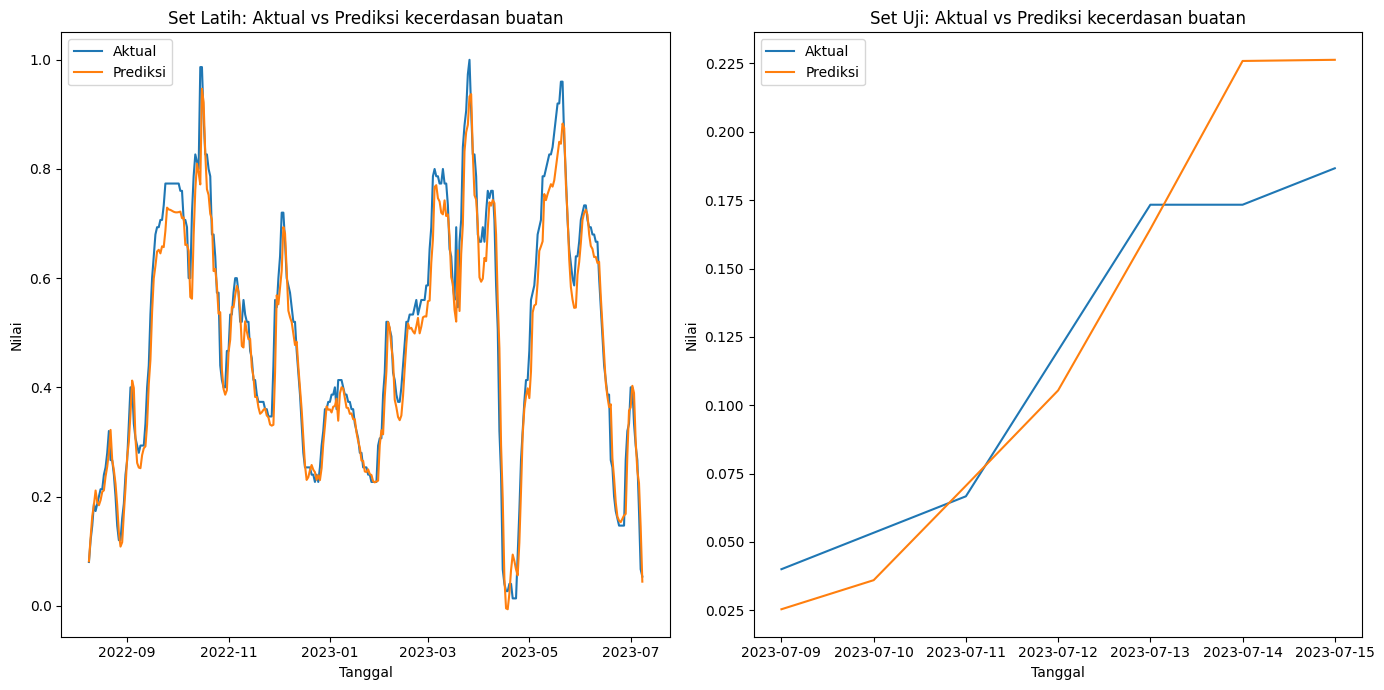

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['kecerdasan buatan']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 20
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Memplot nilai aktual vs prediksi untuk set latih dan uji
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.subplot(1, 2, 1)
plt.plot(dates[:train_size], y_train, label='Aktual')
plt.plot(dates[:train_size], train_predicted, label='Prediksi')
plt.title('Set Latih: Aktual vs Prediksi kecerdasan buatan')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

# Memplot prediksi uji
plt.subplot(1, 2, 2)
plt.plot(dates[train_size:], y_test, label='Aktual')
plt.plot(dates[train_size:], test_predicted, label='Prediksi')
plt.title('Set Uji: Aktual vs Prediksi kecerdasan buatan')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

plt.tight_layout()
plt.show()


Total data: 346
Data latih: 339
Data uji: 7
Epoch 1/250
8/8 [==============================] - 5s 171ms/step - loss: 0.1139 - mae: 0.2765 - mape: 1684773.7500 - val_loss: 0.0888 - val_mae: 0.2444 - val_mape: 275.0762
Epoch 2/250
8/8 [==============================] - 0s 19ms/step - loss: 0.0347 - mae: 0.1460 - mape: 3010763.2500 - val_loss: 0.0487 - val_mae: 0.1774 - val_mape: 199.9847
Epoch 3/250
8/8 [==============================] - 0s 21ms/step - loss: 0.0204 - mae: 0.1145 - mape: 2084436.8750 - val_loss: 0.0448 - val_mae: 0.1757 - val_mape: 172.8818
Epoch 4/250
8/8 [==============================] - 0s 18ms/step - loss: 0.0184 - mae: 0.1079 - mape: 2215462.7500 - val_loss: 0.0517 - val_mae: 0.1792 - val_mape: 210.0436
Epoch 5/250
8/8 [==============================] - 0s 17ms/step - loss: 0.0169 - mae: 0.1034 - mape: 2416991.5000 - val_loss: 0.0459 - val_mae: 0.1711 - val_mape: 193.5024
Epoch 6/250
8/8 [==============================] - 0s 18ms/step - loss: 0.0159 - mae: 0.1010 - 

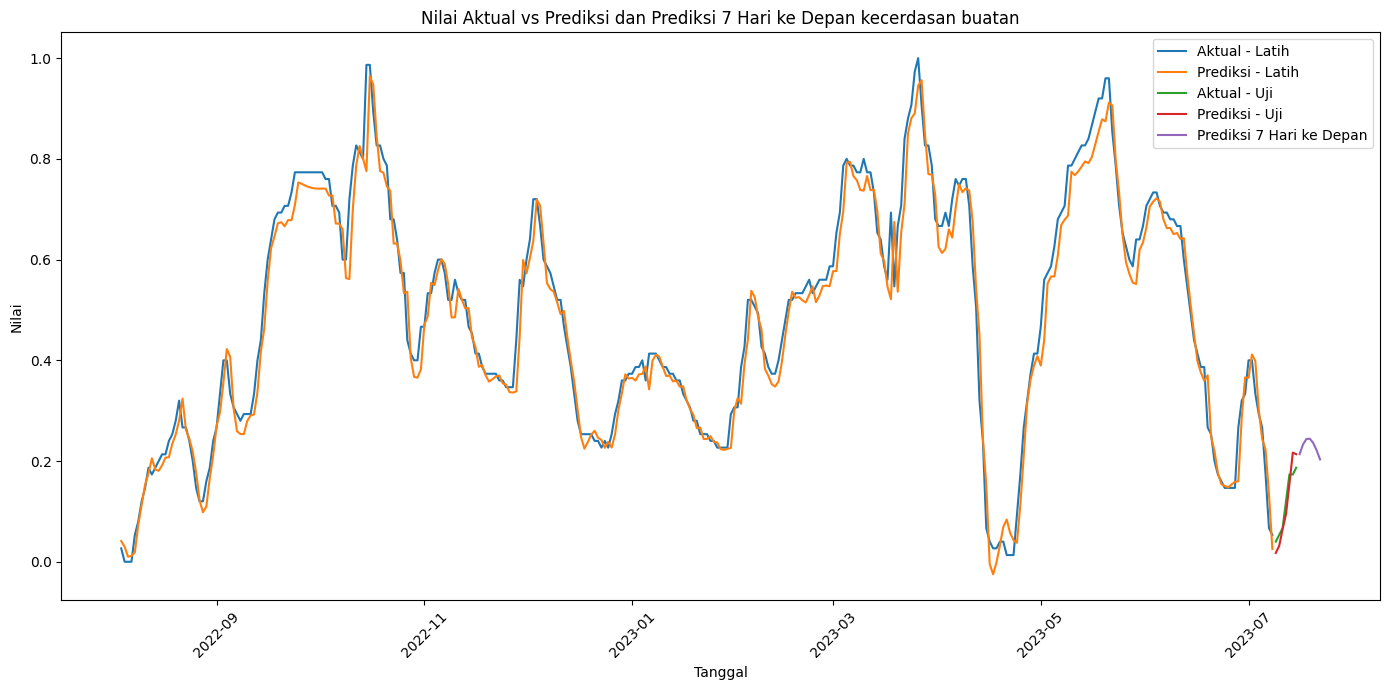

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import timedelta, datetime

# Fungsi MAPE kustom untuk menghindari pembagian dengan nol
def custom_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Memuat data
data = pd.read_csv('merged_data3.csv')

# Mengubah kolom 'Date_int' menjadi datetime
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menetapkan 'Date_int' sebagai indeks
data.set_index('Date_int', inplace=True)

# Memilih kolom target
data_series = data['kecerdasan buatan']

# Menormalkan data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

# Membuat dataset lag
def create_lagged_dataset(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lag = 15
X, y = create_lagged_dataset(scaled_data, lag)

# Membentuk ulang data untuk LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Membagi data menjadi data pelatihan dan pengujian
train_size = len(X) - 7  # Menggunakan 7 baris terakhir untuk pengujian
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menormalkan data target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Padatkan data target
y_train_scaled = y_train_scaled.flatten()
y_test_scaled = y_test_scaled.flatten()

print(f"Total data: {len(X)}")
print(f"Data latih: {train_size}")
print(f"Data uji: {len(X_test)}")

# Menginisialisasi model
regressorLSTM = Sequential()

# Menambahkan lapisan LSTM
regressorLSTM.add(Input(shape=(X_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(LSTM(50, return_sequences=False))

# Menambahkan lapisan output
regressorLSTM.add(Dense(1))

# Mengompilasi model
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Melatih model
model = regressorLSTM.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=250)

# Menampilkan ringkasan model
regressorLSTM.summary()

# Mendapatkan prediksi untuk data latih dan uji
train_predicted_scaled = regressorLSTM.predict(X_train)
test_predicted_scaled = regressorLSTM.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
train_predicted = scaler_y.inverse_transform(train_predicted_scaled)
test_predicted = scaler_y.inverse_transform(test_predicted_scaled)

# Mengevaluasi model
train_score = regressorLSTM.evaluate(X_train, y_train_scaled)
test_score = regressorLSTM.evaluate(X_test, y_test_scaled)

# Menghitung RMSE untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train, train_predicted))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predicted))

# Menghitung MAPE untuk data latih dan uji menggunakan fungsi MAPE kustom
train_mape = custom_mape(y_train, train_predicted)
test_mape = custom_mape(y_test, test_predicted)

print(f"Train Score (MSE): {train_score[0]}")
print(f"Test Score (MSE): {test_score[0]}")
print(f"Train Score (RMSE): {train_rmse}")
print(f"Test Score (RMSE): {test_rmse}")
print(f"Train Score (MAPE): {train_mape}")
print(f"Test Score (MAPE): {test_mape}")

# Mengembalikan skala y_train dan y_test ke skala asli
y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = model.predict(current_sequence.reshape((1, lag, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 7 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler_y.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = data.index[-1]

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

# Memplot nilai aktual vs prediksi untuk set latih dan uji, serta prediksi masa depan
plt.figure(figsize=(14, 7))

# Mendapatkan tanggal untuk plot
dates = data.index[lag:]

# Memplot prediksi latih
plt.plot(dates[:train_size], y_train, label='Aktual - Latih')
plt.plot(dates[:train_size], train_predicted, label='Prediksi - Latih')

# Memplot prediksi uji
plt.plot(dates[train_size:], y_test, label='Aktual - Uji')
plt.plot(dates[train_size:], test_predicted, label='Prediksi - Uji')

# Memplot prediksi masa depan
plt.plot(future_dates, future_predictions, label='Prediksi 7 Hari ke Depan')

plt.title('Nilai Aktual vs Prediksi dan Prediksi 7 Hari ke Depan kecerdasan buatan')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import timedelta, datetime

# Memilih kolom target
data_series = data['kecerdasan buatan']

# Function to predict future values
def predict_future(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_value = regressorLSTM.predict(current_sequence.reshape((1, 15, 1)))
        future_predictions.append(next_value[0, 0])
        current_sequence = np.append(current_sequence[1:], next_value)

    return future_predictions

# Predict the next 10 days
last_sequence = X_test[-1]
future_steps = 7
future_predictions = predict_future(regressorLSTM, last_sequence, future_steps)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Define the starting date manually
start_date = datetime.strptime('20230715', '%Y%m%d')

# Generate future dates starting from the manually defined date
future_dates = [start_date + timedelta(days=i) for i in range(1, future_steps + 1)]

# Print future predictions with dates
future_predictions_with_dates = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_predictions.flatten()})
print(future_predictions_with_dates)

1/1 [==============================] - 0s 18ms/step
        Date  Predicted Value
0 2023-07-16        41.022419
1 2023-07-17        42.478649
2 2023-07-18        43.285294
3 2023-07-19        43.323277
4 2023-07-20        42.692310
5 2023-07-21        41.585800
6 2023-07-22        40.239086


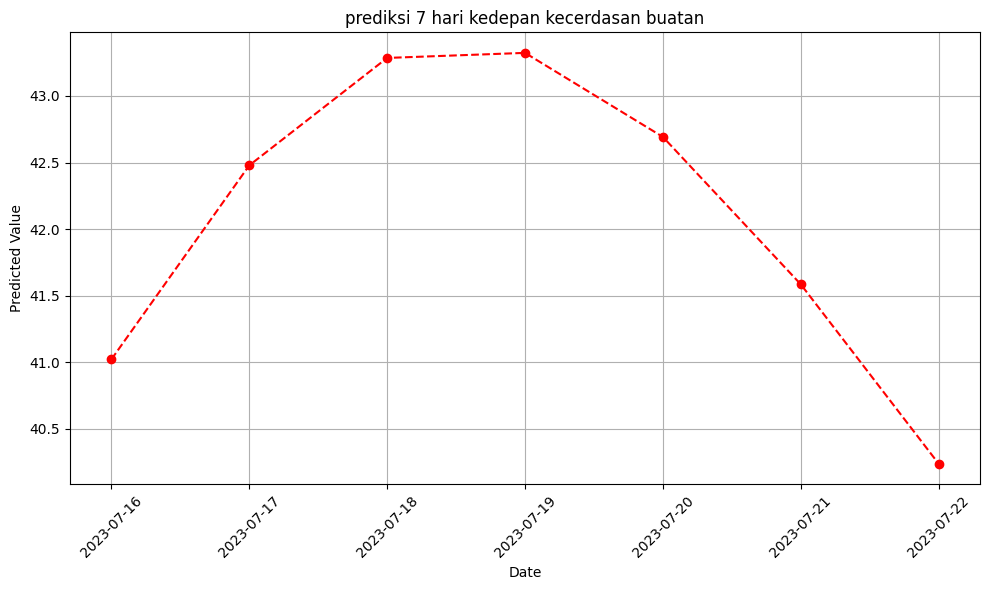

In [ ]:
# Plot the future predictions
# Memilih kolom target
data_series = data['kecerdasan buatan']

plt.figure(figsize=(10, 6))
plt.plot(future_predictions_with_dates['Date'], future_predictions_with_dates['Predicted Value'], marker='o', linestyle='--', color='r')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('prediksi 7 hari kedepan kecerdasan buatan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


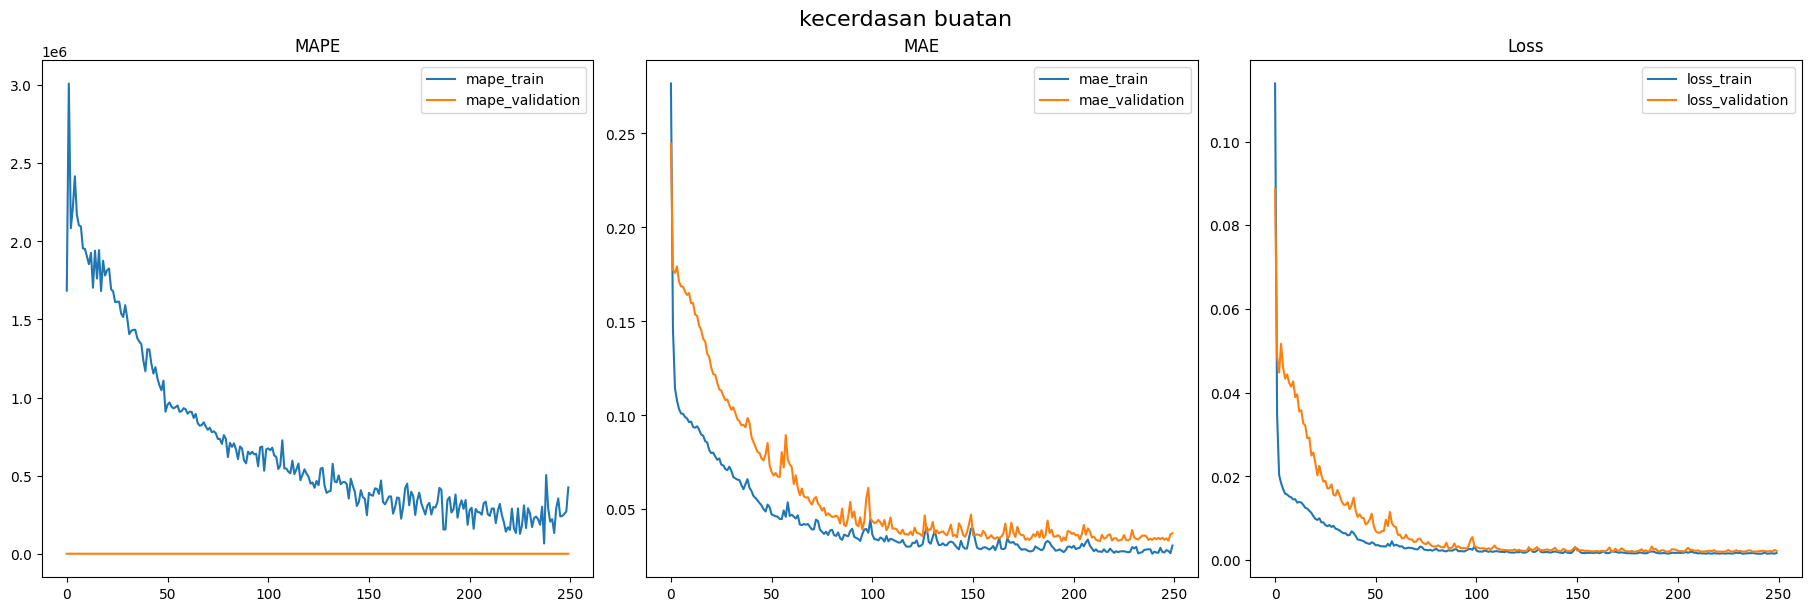

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

fig.suptitle('kecerdasan buatan', fontsize=16)

axs[0].plot(model.history['mape'], label='mape_train')
axs[0].plot(model.history['val_mape'], label='mape_validation')
axs[0].legend()
axs[0].set_title('MAPE')

axs[1].plot(model.history['mae'], label='mae_train')
axs[1].plot(model.history['val_mae'], label='mae_validation')
axs[1].legend()
axs[1].set_title('MAE')

axs[2].plot(model.history['loss'], label='loss_train')
axs[2].plot(model.history['val_loss'], label='loss_validation')
axs[2].legend()
axs[2].set_title('Loss')

plt.savefig('nilai_loss_kb.png')

plt.show()

## Menggabungkan Hasil Plot

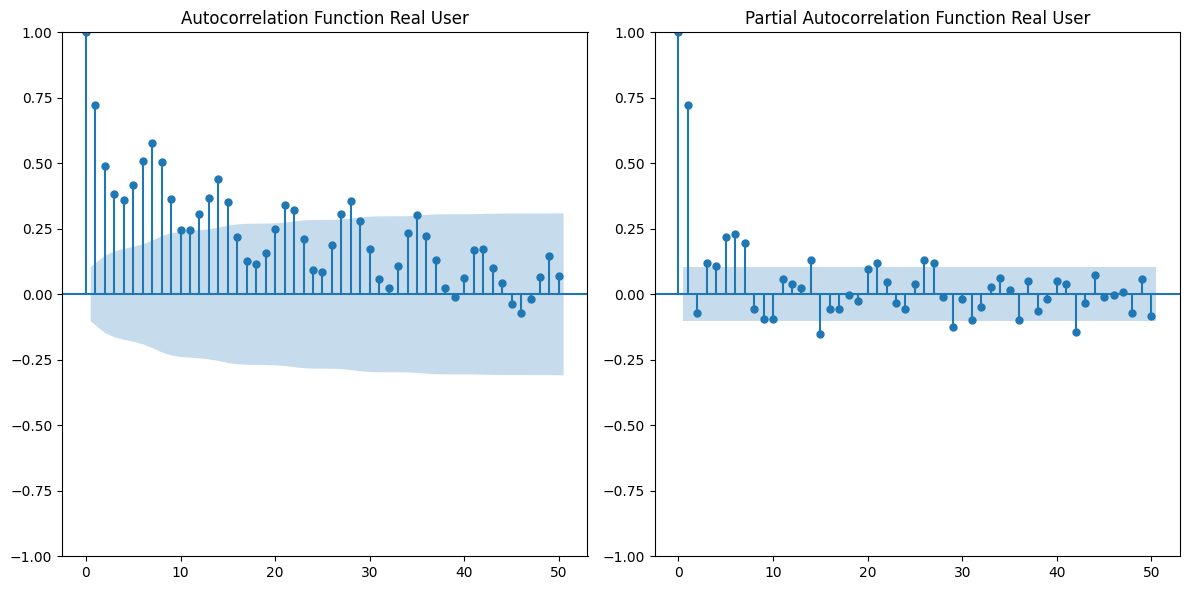

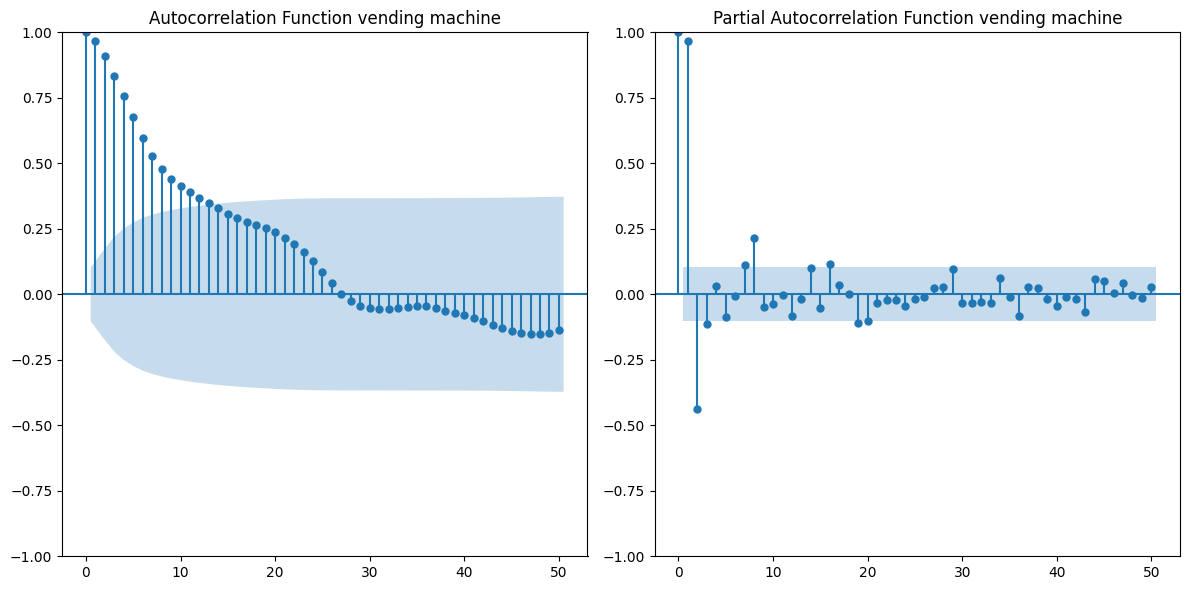

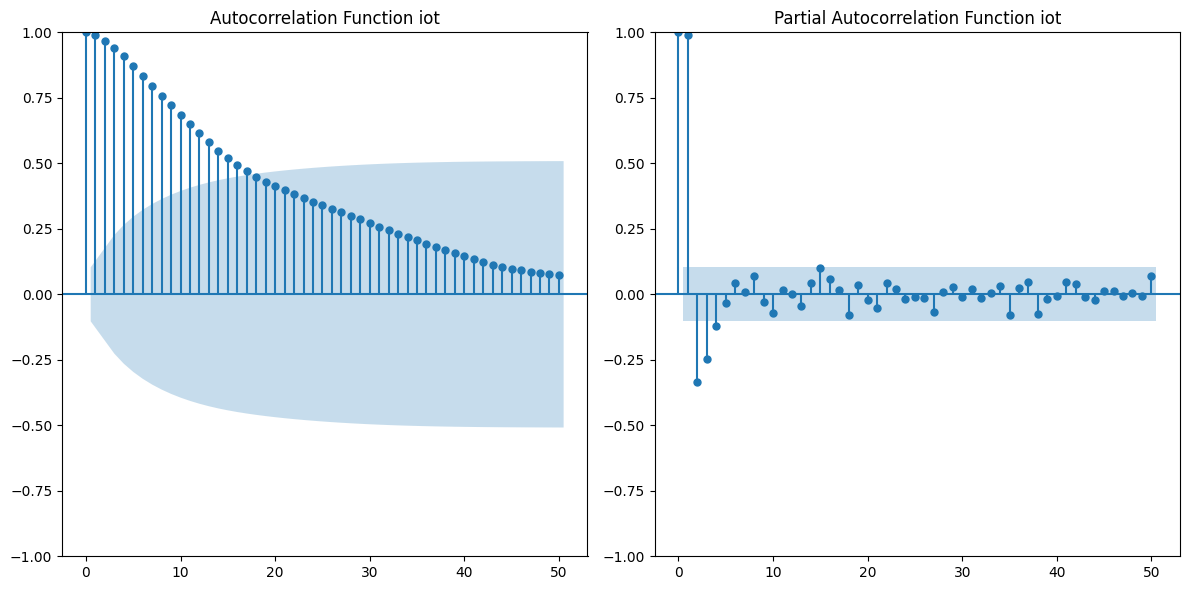

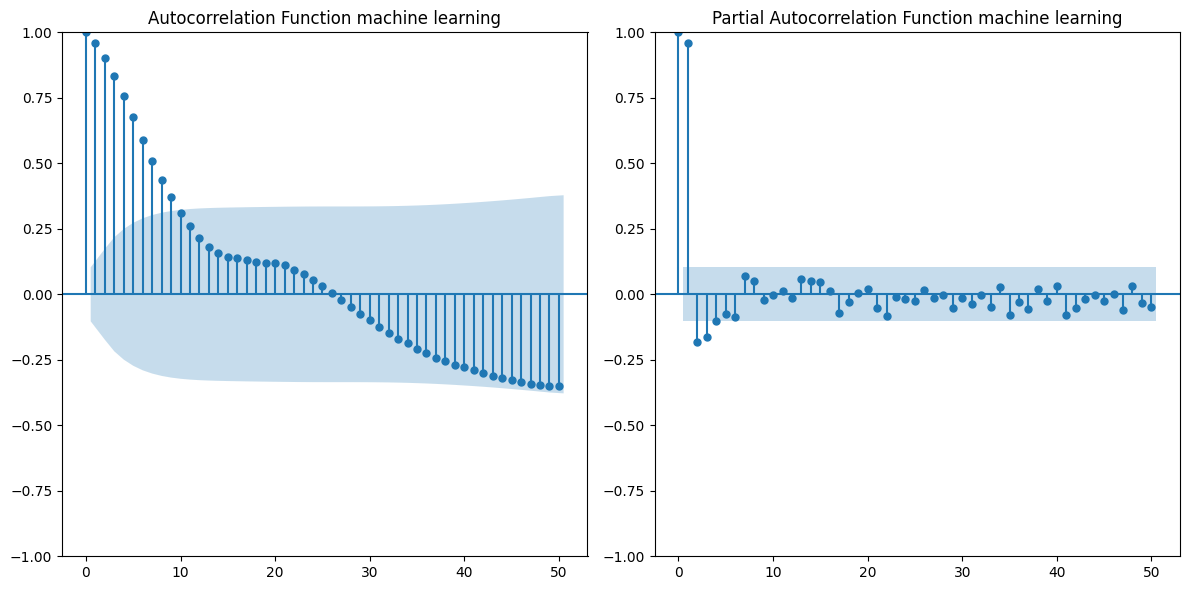

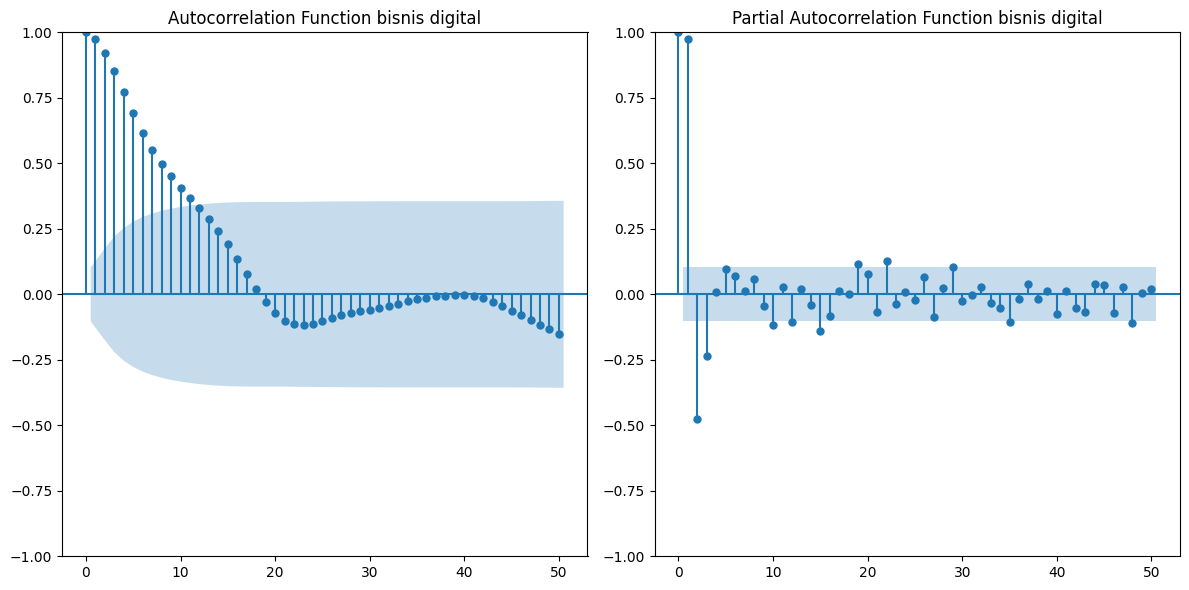

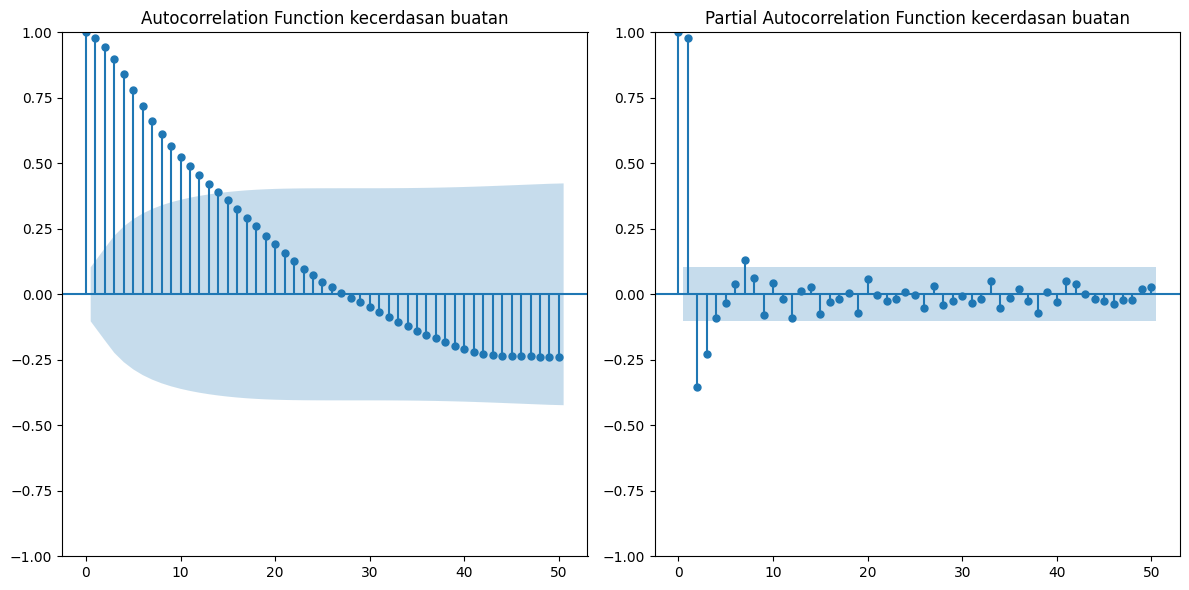

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Fungsi untuk plot ACF dan PACF
def plot_acf_pacf(data_series, title_prefix):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(data_series, lags=50, ax=plt.gca())
    plt.title(f'Autocorrelation Function {title_prefix}')

    plt.subplot(122)
    plot_pacf(data_series, lags=50, ax=plt.gca())
    plt.title(f'Partial Autocorrelation Function {title_prefix}')

    plt.tight_layout()
    plt.show()

# Memuat data tanpa mengonversi kolom tanggal
data = pd.read_csv('merged_data3.csv')

# Mengonversi kolom 'Date' ke format datetime dengan format yang sesuai
data['Date_int'] = pd.to_datetime(data['Date_int'], format='%m/%d/%Y')

# Menentukan kolom tanggal sebagai index
data.set_index('Date_int', inplace=True)

# List kolom yang akan di plot
columns = ['Real User', 'vending machine', 'iot', 'machine learning', 'bisnis digital', 'kecerdasan buatan']

# Plot ACF dan PACF untuk setiap kolom
for column in columns:
    data_series = data[column]
    plot_acf_pacf(data_series, column)

plt.savefig('nilai_ACF_PACF.png')